# Project Proposal and Initial Analyses

So, what ingredients are needed to craft the perfect concoction for a movie's success? Our team embarked on this cinematic experiment by defining the core questions that drive our analysis and consulting with our head scientist (TA, of course!) during Friday meetups for guidance. With a green light on our five key ingredients, we're set to uncover the data-driven formula behind a successful movie, starting with our main ingredient: the CMU Movies dataset.

In [ ]:
# Let's first import all the necessary libraries 

# For data manipulation
import pandas as pd
import numpy as np
import scipy

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning for bar graph hues
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Overview of CMU Movies Dataset 

Note: As mentioned on ED and confirmed with our head scientist, Dr. Sepideh, we opted not to upload the full CMU dataset to GitHub. Instead, one team member loaded it locally and created a pickle file, cmu_movies_df.pkl, which can be found in the pickles folder. This file was created in pipelines/movies_cleaning.ipynb. 

In that pipeline, we preprocess the CMU dataset by separating Freebase IDs from their corresponding values, allowing for easier analysis of categorical variables such as languages, countries, and genres. Specifically, we split these columns so that each Freebase ID has a corresponding human-readable name in a separate column. Here’s an example of how we apply this split function:

```python
# Applying the split function to Languages, Countries, and Genres columns
df[['Language Freebase ID', 'Language Name']] = df['Languages'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Country Freebase ID', 'Country Name']] = df['Countries'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Genre Freebase ID', 'Genre Name']] = df['Genres'].apply(lambda x: pd.Series(split_freebase_data(x)))
```

This step ensures that we can work with a clearer, more structured dataset, which improves the interpretability of our results.

Let’s load that pickle below:

In [2]:
# Loading our CMU movies pickle 
df_cmu_movies = pd.read_pickle("pickles/cmu_imdb_tmdb_merged.pkl")

# Displaying the first few rows
df_cmu_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


In [4]:
# Let us see the data frames dimension
df_size = df_cmu_movies.shape
print(f"Number of row entries: {df_size[0]} \nNumber of columns: {df_size[1]}")


Number of row entries: 81855 
Number of columns: 24


In [3]:
df_cmu_movies.columns

Index(['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie Name', 'Release Date',
       'Box Office Revenue', 'Runtime', 'Language Freebase ID',
       'Language Name', 'Country Freebase ID', 'Country Name',
       'Genre Freebase ID', 'Genre Name', 'IMDb_ID', 'vote_average',
       'vote_count', 'revenue', 'budget', 'popularity', 'production_companies',
       'director', 'writers', 'producers', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [5]:
df_cmu_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


#### Duplicates 

Now, let us check for duplicates.

In [6]:
# Checking for duplicates in df_cmu_movies
print(f"Duplicates in df_cmu_movies: {df_cmu_movies['Movie Name'].duplicated().sum()}")

Duplicates in df_cmu_movies: 6377


We initially planned to drop movies with the same name, but we realized that having the same title doesn't necessarily mean it's the same movie. Variations in factors such as production country, release year, and different versions can result in multiple entries with the same title, which makes it important to retain these records rather than remove them.

In [7]:
# Creating a data set with cmu movie duplicates to take a closer look at them
df_cmu_duplicates = df_cmu_movies[df_cmu_movies.duplicated(subset=['Movie Name'], keep=False)]

# Sorting them by Movie Name alphabetically
df_cmu_duplicates = df_cmu_duplicates.sort_values(by='Movie Name')

df_cmu_duplicates.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
77399,8422241,/m/0272wbj,100 Days,1991,NaN,161.0,[/m/03k50],[Hindi Language],[/m/03rk0],[India],...,8.0,0.0,0.0,1.739,Jayvijay Enterprises,Partho Ghosh,"Devjyoti Roy, Bhushan Banmali",Jay Mehta,6.3,1188.0
19013,15498803,/m/03mc7x8,100 Days,2001-02-01,NaN,100.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,2.0,0.0,0.0,2.121,NaN,Nick Hughes,Nick Hughes,NaN,7.6,85.0
12216,31239628,/m/0gj9wpb,100% Love,2011-04,NaN,140.0,[/m/09s02],[Telugu language],[],[],...,29.0,0.0,1500000.0,5.203,Geetha Arts,Sukumar,"Hari Prasad, Sukumar, Thota Srinivas","Edida Raja, Bunny Vas, Allu Aravind",7.0,3240.0
69286,34757217,/m/0j3df_d,100% Love,2012-01-20,NaN,NaN,[/m/01c7y],[Bengali Language],[/m/03rk0],[India],...,5.0,0.0,0.0,2.082,SVF Entertainment,Ravi Kinagi,Selvaraghavan,"Jeet, Shrikant Mohta, Mahendra Soni",6.0,886.0
17910,33940717,/m/0j626hk,12,2003-06-27,NaN,124.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,19.0,0.0,0.0,1.658,NaN,Lawrence Bridges,Lawrence Bridges,NaN,7.7,55.0


In [8]:
# df_cmu_movies = df_cmu_movies.drop_duplicates(subset=['Movie Name'])

#### Null Values

From the data frame head, we see several NaN values. It’s important to understand how many NaNs are present across the entire dataset. We can visualize this with a bar graph, like this:

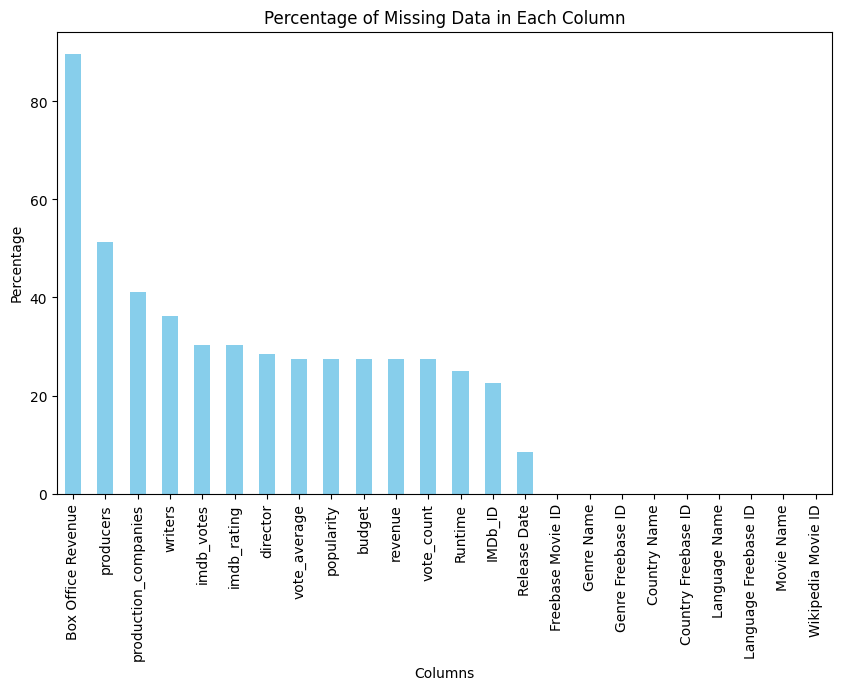

In [9]:
# Calculating the percentage of missing data in each column
missing_data = df_cmu_movies.isnull().mean() * 100

# Sorting columns by missing percentage
missing_data_sorted = missing_data.sort_values(ascending=False)

# Plotting 
plt.figure(figsize=(10,6))
missing_data_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Our dataset has a significant amount of missing values in the box office revenue column, which makes it difficult to apply common techniques like removing rows with null values or replacing them with the mean, as this would lead to substantial data loss.

However, it's important to note that box office revenue is just one component of total revenue, and we have much less missing data in the revenue column. Therefore, when working with the box office data, we can closely consider its relationship to total revenue and use that for further insights.

For other columns with missing data, such as producers, production company, writers, and director, we won't focus on them as much in our analysis. You'll find more details in the analyses below.

## Analysis Proposal 

Now that we have a comprehensive understanding of our data, let's dive into our  'chemical ingredients' that contribute to a movie's success, which have been aproved by our head TA.

### Actor's Success

When people think about a movie's success, the first thing that often comes to mind is the actors. A well-known actor can elevate a movie, making it more popular, drawing larger audiences, and ultimately contributing to its commercial success. Conversely, an unknown actor may not have the same impact. In this section, we aim to explore whether there is a relationship between an actor's success and the average movie ratings they appear in.

To conduct this analysis, we will leverage several datasets: the Oscar dataset, IMDb dataset, the CMU Movie dataset, and Rotten Tomatoes dataset.

Before diving into the analysis, we must first define what constitutes a "successful actor." For many in the industry, winning an Oscar is the pinnacle of achievement. While an actor's success can be measured in many ways, for the purposes of this milestone, we will define a successful actor as one who has won the highest number of Oscars.

To begin, let us load the pickles of the mentioned data sets:

In [10]:
oscar = pd.read_pickle('pickles/oskar_df.pkl')

# this IMDB is a little different because it also has a "crew" column
# which is important to us in the next few steps
imdb = pd.read_pickle('pickles/imdb_data.pkl')

##### Oscar Dataset

We will start off with the Oscar data. Let us first check if we have any null values:

In [11]:
null_counts = oscar.isnull().sum()
print(null_counts)

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64


In [12]:
df_size = oscar.shape
print(f"Dimensions of the Oscar DataFrame: {df_size}")

Dimensions of the Oscar DataFrame: (10889, 7)


Since our analysis is focused on Oscar wins rather than the film names, we can ignore the null values in the film name column.

However, actor names are crucial for our analysis, so we will drop the 5 rows with null actor names, as this is not a significant amount of data and will not impact our results.

In [13]:
oscar_analysis = oscar.dropna(subset=['name'])

Let us take a peak at the Oscar data:

In [14]:
oscar_analysis.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10883,2023,2024,96,WRITING (Original Screenplay),Screenplay by Samy Burch; Story by Samy Burch ...,May December,False
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True
10888,2023,2024,96,HONORARY AWARD,"To Carol Littleton, whose commitment to her cr...",NaN,True


The Oscars are awarded not only to actors and actresses, but also to individuals in various other categories. Therefore, we will filter out anyone who does not fall into the actor or actress category for the purposes of our analysis.

In [15]:
oscar_analysis = oscar_analysis[oscar_analysis['category'].str.contains('ACTOR') | oscar_analysis['category'].str.contains('ACTRESS')]

In [16]:
# We used tail instead of head because head didn't visually highlight the impact of the previous line of code,
# while tail provided a clearer view of the results.
oscar_analysis.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10780,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Emily Blunt,Oppenheimer,False
10781,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Danielle Brooks,The Color Purple,False
10782,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,America Ferrera,Barbie,False
10783,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Jodie Foster,Nyad,False
10784,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Da'Vine Joy Randolph,The Holdovers,True


Wow! Quite lucky of us compared to the CMU movies data haha.

##### Oscar Score

We also notice that Best Actor and Best Actress aren’t the only possible Oscar wins; actors can also receive recognition in Supporting Actor and Supporting Actress categories. Additionally, Oscar nominations play a significant role, as even a nomination can enhance an actor’s reputation and attract audiences.

However, lead roles generally have a larger impact on a movie’s success, as these actors often drive the story and have more screen time.  For this reason, we are going to build an Oscar score that applies weights to different award categories, giving greater significance to lead roles and including nominations to reflect their influence. We have decided to apply the following weights:

- Lead Actor Oscar Win (LAO) has weight 4. 

- Supporting Actor Oscar Win (SAO) has weight 3.

- Lead Actor Oscar Nomination (LAN) has weight 2. 

- Supporting Actor Oscar (SAN) Nomination has weight 1.

Oscar Score= [# of LAO]*5 + [# of SAO]*3 +  [# of LAN]*2+ [# of SAN]×1

Let us add an Oscar Score column to the Oscar dataset:

First, let us transform the Winner column into integers:

In [17]:
# Converting boolean 'winner' column to 1 and 0
oscar_analysis['winner'] = oscar_analysis['winner'].astype(int)
oscar_analysis.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0


Now let us calculate the oscar score:

In [18]:
def calculate_oscar_score(row):
    # Weights for each type of win or nomination
    lao = 5  
    sao = 3  
    lan = 2  
    san = 1  

    oscar_score = 0

    # Lead role win: No "supporting" in category and winner = 1
    if 'SUPPORTING' not in row['category'].upper() and row['winner'] == 1:
        oscar_score += lao

    # Supporting role win: "supporting" in category and winner = 1
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 1:
        oscar_score += sao

    # Lead role nomination: No "supporting" in category and winner = 0
    elif 'SUPPORTING' not in row['category'].upper() and row['winner'] == 0:
        oscar_score += lan

    # Supporting role nomination: "supporting" in category and winner = 0
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 0:
        oscar_score += san

    return oscar_score

oscar_analysis['oscar_score'] = oscar_analysis.apply(calculate_oscar_score, axis=1)


In [19]:
oscar_analysis.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,oscar_score
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0,2
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1,5
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0,2
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1,5
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0,2


Let us remove the columns that are unnecessary for our section anlaysis.

In [20]:
oscar_analysis = oscar_analysis.drop(['year_ceremony', 'ceremony','year_film','ceremony','category','film','winner'], axis=1)
oscar_analysis = oscar_analysis.rename(columns={'name': 'actor_name'})
oscar_analysis.head()

,actor_name,oscar_score
0,Richard Barthelmess,2
1,Emil Jannings,5
2,Louise Dresser,2
3,Janet Gaynor,5
4,Gloria Swanson,2


Now, let us group these scores by Actor:

In [21]:
# Grouping by actor and sum the 'oscar_score', and also count the number of movies
oscar_analysis = oscar_analysis.groupby('actor_name').agg(total_oscar_score=('oscar_score', 'sum')).reset_index()

# Display the result
oscar_analysis.head()

,actor_name,total_oscar_score
0,Abigail Breslin,1
1,Adam Driver,3
2,Adolph Caesar,1
3,Adolphe Menjou,2
4,Adriana Barraza,1


Let us see what are the top 10 actors according to the Oscar Score:

In [22]:
oscar_analysis.sort_values(by='total_oscar_score', ascending=False, inplace=True)
oscar_analysis.head(10)

,actor_name,total_oscar_score
673,Meryl Streep,46
524,Katharine Hepburn,36
92,Bette Davis,28
392,Jack Nicholson,28
881,Spencer Tracy,24
216,Denzel Washington,21
382,Ingrid Bergman,21
639,Marlon Brando,21
391,Jack Lemmon,20
742,Paul Newman,20


##### IMDB Data set 

Now, let us incorporate the IMDB data in the Oscar Analysis. We are going to calculate the average IMDB score for each actor.

The actor names are stored in the 'crew' column, which contains a comma-separated list of all actors in the movie. To check if a specific actor is part of the movie, we will split the string of actor names and search for the actor in that list. If the actor is found, we will add the movie's IMDb rating to the actor's total IMDb score.

In [23]:
def calculate_imdb_scores(oscar_analysis, imdb):
    # Creating imdb_score and num_movies
    oscar_analysis['imdb_score'] = 0
    oscar_analysis['num_movies'] = 0

    # Looping through each movie
    for index, row in imdb.iterrows():
        # Split the 'crew' column to get a list of actors
        crew_list = str(row['crew']).split(',') 
        imdb_rating = row['score'] 

        # Looping through each actor
        for actor in oscar_analysis['actor_name']:
            # If actor is in the list of actors for the current movie
            if actor in crew_list:
                # Adding the IMDb score to the actor's total score
                oscar_analysis.loc[oscar_analysis['actor_name'] == actor, 'imdb_score'] += imdb_rating
                # Incrementing the number of movies the actor has participated in
                oscar_analysis.loc[oscar_analysis['actor_name'] == actor, 'num_movies'] += 1

    # Calculating average IMDb score 
    oscar_analysis['imdb_score'] = oscar_analysis['imdb_score'] / oscar_analysis['num_movies']

    return oscar_analysis


In [24]:
oscar_analysis = calculate_imdb_scores(oscar_analysis, imdb)
oscar_analysis.head()

,actor_name,total_oscar_score,imdb_score,num_movies
673,Meryl Streep,46,67.375,8
524,Katharine Hepburn,36,76.000,1
92,Bette Davis,28,80.500,2
392,Jack Nicholson,28,73.300,10
881,Spencer Tracy,24,75.000,2


#### Section Conclusion

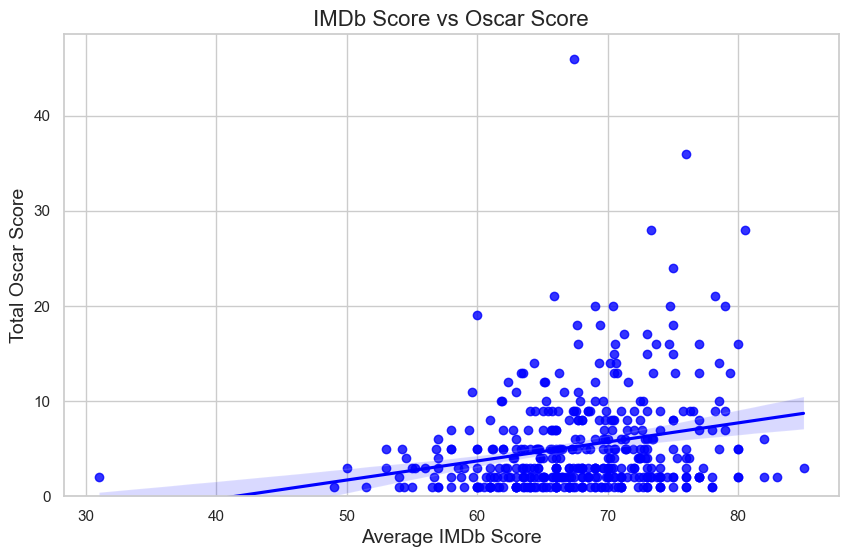

In [25]:
# Creating the scatter plot for imdb_score vs total_oscar_score
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='imdb_score', y='total_oscar_score', data=oscar_analysis, color='blue', marker='o')
plt.ylim(0, None)  # Set the lower limit to 0 to remove negative y values
plt.title('IMDb Score vs Oscar Score', fontsize=16)
plt.xlabel('Average IMDb Score', fontsize=14)
plt.ylabel('Total Oscar Score', fontsize=14)
plt.show()


The plot of IMDb scores versus Oscar scores shows a slight correlation between the two variables, but the relationship is not strong as we can see by the regression line. While some actors with higher Oscar scores also tend to have higher IMDb scores, this pattern is not consistent across all data points. One reason for this is that the Oscars and IMDb ratings measure different aspects of an actor's career. 

Oscar scores are based on professional recognition for outstanding performances, typically within the context of prestigious award ceremonies, whereas IMDb scores reflect the general public's opinion of movies and performances. These two metrics are influenced by different factors—Oscar wins or nominations are often determined by industry professionals, while IMDb ratings are driven by broader audience sentiments. 

As a result, while some actors may appear in both highly rated Oscar-winning films and movies with high IMDb scores, the correlation between the two is weak. This is because each score is influenced by different factors and biases—Oscars are based on the opinions of industry professionals, while IMDb ratings reflect general public sentiment.

It is thus  useful to conduct further experiments and explore additional factors that could impact a movie's success. We should also consider incorporating other sources of data, such as Metacritic, which includes professional critics' ratings, and Rotten Tomatoes, to provide a more comprehensive view of a movie's reception across different audiences.

### Budget 

In this section, we will explore an important question: Does a higher budget imply better revenue and ratings, and therefore, greater movie success? While it might seem intuitive that a larger budget would lead to greater success, the relationship between a movie's financial investment and its performance is more complex. We'll investigate whether bigger budgets truly correlate with higher box office earnings and better ratings, or if other factors play a more significant role in determining a movie's success. By understanding this connection, we can gain insights into the financial dynamics of the film industry.

To begin our exploration, we will first create a master ratings table by combining the ratings data from multiple sources—Metacritic, IMDb, and Rotten Tomatoes. This will give us a comprehensive view of how a movie is received across different platforms. Additionally, we will gather the budget and revenue information from the IMDb table, as it contains the most reliable financial data for our analysis. By combining these datasets, we aim to better understand whether movies with higher budgets tend to perform better in terms of both revenue and ratings, providing a clearer picture of what factors contribute to a film's success.


#### Metacritic

Let us start off with the metacritic scores.

In [26]:
# Importing Metacritic
metacritic = pd.read_pickle('pickles/metacritic_df.pkl')    
metacritic.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,1989-07-26,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,2000-12-08,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,1970-09-11,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,1943-01-15,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,2015-06-19,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7


In [27]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_metacritic = metacritic.drop(columns=['id','release_date','sort_no','summary','rating'])
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),8.9
1,94,"Crouching Tiger, Hidden Dragon",8.2
2,94,The Wild Child,6.5
3,94,Shadow of a Doubt,8.2
4,94,Inside Out,8.7


Let us check for nulls.

In [28]:
df_metacritic.isnull().sum()

metascore     0
title         0
user_score    0
dtype: int64

We see that there are a several user scores that are null. We will adress those later on. 

We also see that Metascore and User Score have different maximum values. To make them comparable, let's normalize the User Score to a scale of 100.

In [29]:
df_metacritic['user_score'] = pd.to_numeric(df_metacritic['user_score'], errors='coerce')
df_metacritic['user_score'] = df_metacritic['user_score'] * 10
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),89.0
1,94,"Crouching Tiger, Hidden Dragon",82.0
2,94,The Wild Child,65.0
3,94,Shadow of a Doubt,82.0
4,94,Inside Out,87.0


As a note, it might be more insightful to experiment with the weights of critic scores and user scores when determining a movie's overall success in the final analysis. However, for P2, we plan to keep things simple by calculating the average of the critic and user scores. The bigger question, though, is: who truly determines a movie's success? As viewers, we are the audience who watch the films and generate revenue, while critics provide professional reviews. It's worth considering how each group's influence should factor into the overall success of a movie. But that is a question for our head scientist (TA) for the final milestone ...


For now though, we will simply take the average and name that our metacritic_score score:

In [30]:
df_metacritic['metacritic_score'] = df_metacritic[['metascore', 'user_score']].mean(axis=1)

# Dropping the unnecessary columns
df_metacritic = df_metacritic.drop(columns=['metascore', 'user_score'])

df_metacritic.head()

,title,metacritic_score
0,Grave of the Fireflies (1988),91.5
1,"Crouching Tiger, Hidden Dragon",88.0
2,The Wild Child,79.5
3,Shadow of a Doubt,88.0
4,Inside Out,90.5


#### Rotten Tomatoes 

Now, let us move to the rotten tomatoes dataset.

In [31]:
rotten_tomatoes = pd.read_pickle('pickles/rotten_tomatoes.pkl')    
rotten_tomatoes.head()

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,writer,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Ryan Coogler, Joe Robert Cole","Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Christopher Markus, Stephen McFeely","Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,...,Christopher McQuarrie,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P..."
3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,...,"George Miller, Brendan McCarthy, Nick Lathouris","May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu..."
4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,...,"Phil Lord, Rodney Rothman","Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al..."


Some columns are not necessary for this section's analyses, so we will remove them for simplicity.

In [32]:
df_tomatoes = rotten_tomatoes.drop(columns=['view_the_collection','writer','rating','genre','original_language','director','producer','year','synopsis','consensus','type','release_date_(theaters)','release_date_(streaming)','runtime','production_co','sound_mix','aspect_ratio','crew'])
df_tomatoes.head()

,title,critic_score,people_score,total_reviews,total_ratings,box_office_(gross_usa)
0,Black Panther,96,79.0,519,"50,000+",$700.2M
1,Avengers: Endgame,94,90.0,538,"50,000+",$858.4M
2,Mission: Impossible -- Fallout,97,88.0,433,"10,000+",$220.1M
3,Mad Max: Fury Road,97,86.0,427,"100,000+",$153.6M
4,Spider-Man: Into the Spider-Verse,97,93.0,387,"10,000+",$190.2M


Similarly, it might be more insightful to experiment with the weights of total ratings, critic scores, and people scores in the final deliverable. But for P2, we plan to keep things simple by taking the average of the critic score and people score.

In [33]:
df_tomatoes['tomatoe_score'] = df_tomatoes[['critic_score', 'people_score']].mean(axis=1)
df_tomatoes = df_tomatoes.drop(columns=['critic_score', 'people_score', 'total_reviews', 'total_ratings'])

df_tomatoes.head()

,title,box_office_(gross_usa),tomatoe_score
0,Black Panther,$700.2M,87.5
1,Avengers: Endgame,$858.4M,92.0
2,Mission: Impossible -- Fallout,$220.1M,92.5
3,Mad Max: Fury Road,$153.6M,91.5
4,Spider-Man: Into the Spider-Verse,$190.2M,95.0


#### Merging 

Before we merge, let us normalize the vote average (tmdb rating) and the imdb rating.

In [34]:
df_cmu_movies.rename(columns={'vote_average': 'tmdb_rating'}, inplace=True)
df_cmu_movies['tmdb_rating'] = df_cmu_movies['tmdb_rating'] * 10
df_cmu_movies['imdb_rating'] = df_cmu_movies['imdb_rating'] * 10
df_cmu_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0


Let the merge begin!

First, we will standardize the movie name columns across each DataFrame to ensure they match and facilitate easier merging.

In [35]:
df_metacritic = df_metacritic.rename(columns={'title': 'movie_name'})
df_tomatoes = df_tomatoes.rename(columns={'title': 'movie_name'})
df_cmu_movies = df_cmu_movies.rename(columns={'Movie Name': 'movie_name'})

In [36]:
# Merge dataframes on 'movie_name'
df_merged = pd.merge(df_cmu_movies, df_tomatoes, on='movie_name', how='left')
df_merged = pd.merge(df_merged, df_metacritic, on='movie_name', how='left')

In [37]:
df_merged.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes,box_office_(gross_usa),tomatoe_score,metacritic_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,NaN,56.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN


We used a left merge in this cascade of merges because it ensures that all the rows from the left DataFrame (starting with df_tomatoes) are preserved, even if there are no matching rows in the right DataFrames, while aligning the relevant data from each source.

Now, let’s combine the 'Box Office Revenue' and 'box_office_(gross_usa)' columns by taking the average. If one of the values is NaN, we’ll keep the non-NaN value. If both are NaN, the result will be NaN.

In [38]:
# Converting the columns to numeric
df_merged['Box Office Revenue'] = pd.to_numeric(df_merged['Box Office Revenue'], errors='coerce')
df_merged['box_office_(gross_usa)'] = pd.to_numeric(df_merged['box_office_(gross_usa)'], errors='coerce')

# Taking the average or keeping non-NaN values
df_merged['box_office'] = df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].mean(axis=1)

# If both values are NaN, the result will be NaN
df_merged['box_office'] = df_merged['box_office'].where(df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].notna().any(axis=1))

# Removing unnecessary columns
df_merged = df_merged.drop(columns=['Box Office Revenue', 'box_office_(gross_usa)'])

df_merged.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,...,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]",...,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]",...,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],...,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN


This is a very useful table, let us make a pickle out of it:

In [39]:
df_merged.to_pickle('pickles/movie_scores.pkl')

Finally, let us grab the average scores of the four platforms!

In [40]:
df_merged['avg_score'] = df_merged[['imdb_rating', 'tomatoe_score', 'metacritic_score','tmdb_rating']].mean(axis=1)
df_merged.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,...,production_companies,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office,avg_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0,52.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]",...,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN,63.0
3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]",...,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN,59.5
4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],...,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN,56.0


In [41]:
df_merged.columns.tolist()

['Wikipedia Movie ID',
 'Freebase Movie ID',
 'movie_name',
 'Release Date',
 'Runtime',
 'Language Freebase ID',
 'Language Name',
 'Country Freebase ID',
 'Country Name',
 'Genre Freebase ID',
 'Genre Name',
 'IMDb_ID',
 'tmdb_rating',
 'vote_count',
 'revenue',
 'budget',
 'popularity',
 'production_companies',
 'director',
 'writers',
 'producers',
 'imdb_rating',
 'imdb_votes',
 'tomatoe_score',
 'metacritic_score',
 'box_office',
 'avg_score']

In [42]:
df_merged.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,...,production_companies,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office,avg_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0,52.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]",...,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN,63.0
3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]",...,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN,59.5
4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],...,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN,56.0


Now, let us plot the box office against the average score to see if there is any correlation between the two variables

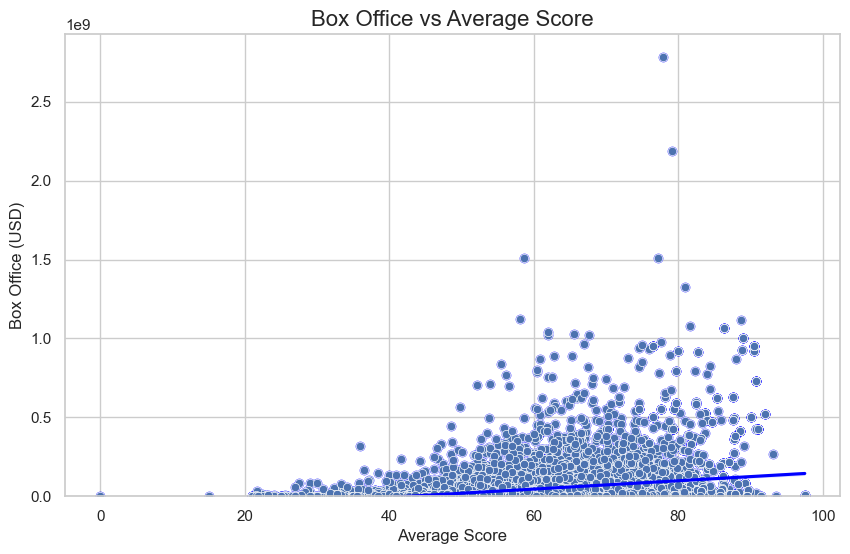

In [43]:
# Removing rows where 'avg_score' or 'box_office' is NaN
df_filtered = df_merged.dropna(subset=['avg_score', 'box_office'])

# Creating a scatter plot of box_office vs avg_score
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_score', y='box_office', data=df_filtered, color='blue', marker='o')
sns.scatterplot(data=df_filtered, x='avg_score', y='box_office')
plt.title('Box Office vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Box Office (USD)', fontsize=12)
plt.ylim(bottom=0)
plt.show()

Hmm okay, let us now do the same but between revenue and average score...

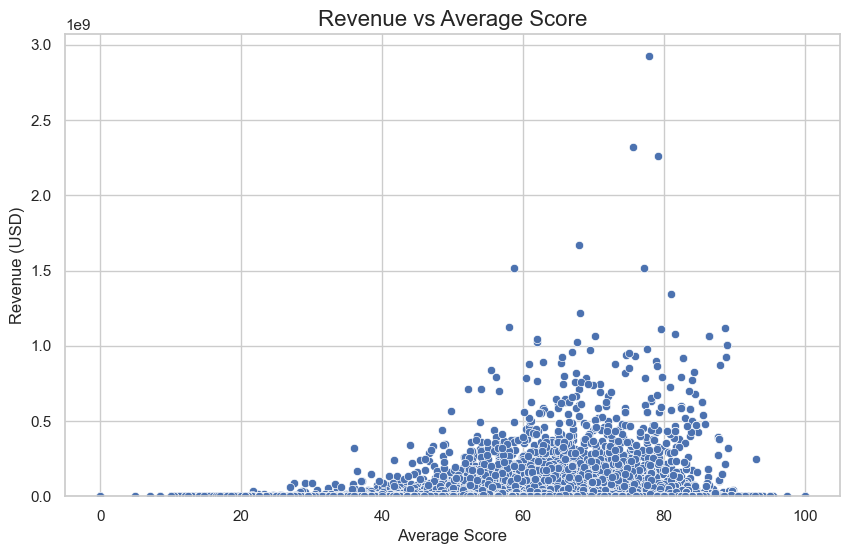

In [44]:
# Removing rows where revenue is NaN
df_filtered_pt2 = df_merged.dropna(subset=['avg_score','revenue'])

# Creating a scatter plot
plt.figure(figsize=(10, 6))
# sns.regplot(x='avg_score', y='revenue', data=df_filtered_pt2, color='blue', marker='o')
sns.scatterplot(data=df_filtered_pt2, x='avg_score', y='revenue')
plt.title('Revenue vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.ylim(bottom=0)
plt.show()

Hmmm alright, what about budget and avg_score...

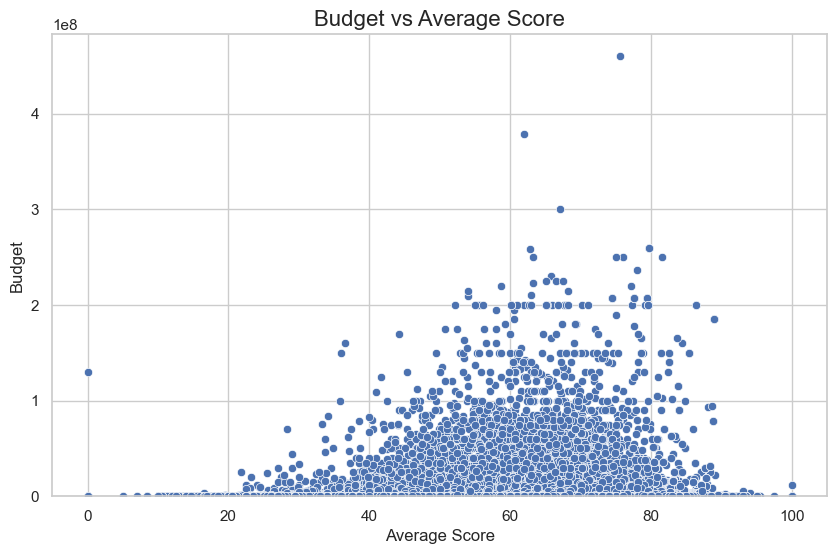

In [45]:
# Removing rows where budget is NaN
df_filtered_pt3 = df_merged.dropna(subset=['avg_score','budget'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
# sns.regplot(x='avg_score', y='budget', data=df_filtered_pt3, color='blue', marker='o')
sns.scatterplot(data=df_filtered_pt3, x='avg_score', y='budget')
plt.title('Budget vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.ylim(bottom=0)
plt.show()

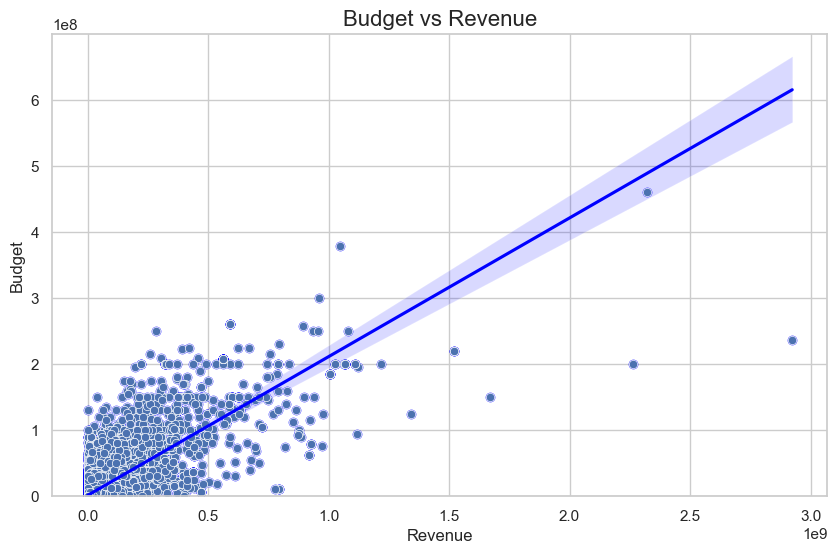

In [46]:
# Removing rows where budget is NaN
df_filtered_pt4 = df_merged.dropna(subset=['revenue','budget'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.regplot(x='revenue', y='budget', data=df_filtered_pt3, color='blue', marker='o')
sns.scatterplot(data=df_filtered_pt4, x='revenue', y='budget')
plt.title('Budget vs Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.ylim(bottom=0)
plt.show()

Budget and revenue often have a strong correlation because a higher budget typically enables more extensive production, marketing, and distribution, which can lead to higher revenues. However, this correlation doesn't directly imply profit since profit is the difference between revenue and budget, and movies with high budgets might still underperform or fail to cover costs due to other factors like audience reception or competition. 

Despite this, the correlation between budget and revenue is still useful for assessing a movie's potential for success, as it gives insights into how much investment might drive broader reach and visibility.


However, our other correlations between average scores and revenue, budget, and box office did not perform as well. This can be attributed to the complexity of movie success, which is influenced by factors beyond just financials and scores, such as marketing, cast appeal, and timing. Outliers in the data, like films with extraordinary budgets or box office numbers, may not follow typical patterns, and some blockbusters with high earnings may have mixed reviews. Additionally, financial metrics like revenue and budget don't always reflect a film’s true cultural or long-term value, while viewer and critic scores often diverge, with popular films receiving low critic scores but performing well at the box office, and vice versa. Thus, these variables don't always show direct correlations due to the multifaceted nature of movie success.

#### Section Conclusion

In conclusion, while budget, revenue, and box office numbers are important indicators of a film's commercial success, they do not always correlate with the critical or audience reception, as reflected in average scores. A movie can perform well financially despite low ratings, or struggle at the box office despite strong reviews, highlighting that factors such as effective marketing, star power, release timing, and cultural trends play significant roles in a movie's success. The complexity of movie success underscores that while financial metrics and ratings provide useful insights, they alone cannot predict the full impact a film may have.

For future analysis in Milestone 3, we could experiment with weighting the scores of movie critics and regular viewers differently, which may offer a more nuanced understanding of how each group influences a film’s success (or maybe not).

### Release Date Timing

The timing of a movie's release plays a crucial role in its commercial performance and critical reception. Certain seasons, such as summer and the holiday period, are traditionally seen as more favorable for movie releases, with the potential for higher box office earnings and increased audience engagement. The question arises: Do movies released during these peak times tend to earn more revenue or receive better ratings from critics and audiences? 

In this section, we will explore the impact of release dates on a movie's success, focusing on how seasonality—whether movies are released in summer, during the holiday season, or in off-peak months—can influence box office performance and ratings. By analyzing trends in movie releases and comparing the performance of films across different seasons, we aim to uncover patterns that may explain the seasonal effects on a film's overall success.

We will start off by making a second copy of df_merged so that to_datetime doesn't make our jutst-year entries NaT in the merged dataframe.

In [47]:
# Creating a second copy so that to_datetime doesn't make our jutst-year entries NaT in the merged dataframe 
df_timing = df_merged
df_timing['release_date'] = pd.to_datetime(df_merged['Release Date'], errors='coerce')

# df_timing with full date
df_full_date = df_merged[~df_timing['release_date'].dt.month.isna()]
df_full_date.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,...,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office,avg_score,release_date
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0,52.0,2001-08-24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-16
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"[/m/06ppq, /m/02h40lc]","[Silent film, English Language]",[/m/09c7w0],[United States of America],"[/m/02hmvc, /m/06ppq, /m/0219x_, /m/01g6gs, /m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1913-05-29
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/04t36, /m/01z4y, /m/01g6gs]",...,Henry King,"Richard Sherman, Kathryn Scola, Lamar Trotti, ...",NaN,68.0,2357.0,NaN,NaN,3600000.0,66.9,1938-08-16
12,6631279,/m/0gffwj,Little city,1997-04-04,93.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/06cvj, /m/0hj3n0w, /m/01t_vv, /m/07s9rl0, ...",...,Roberto Benabib,Roberto Benabib,NaN,58.0,1148.0,NaN,NaN,NaN,49.0,1997-04-04


Let us add a season column into the full-date movies data frame:

In [49]:
def add_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# Applying the function to create the 'season' column
df_full_date.loc[:, 'season'] = df_full_date['release_date'].dt.month.apply(add_season)

# Now we can filter by season
df_full_date.head()

,Wikipedia Movie ID,Freebase Movie ID,movie_name,Release Date,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,...,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office,avg_score,release_date,season
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0,52.0,2001-08-24,Summer
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-16,Winter
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"[/m/06ppq, /m/02h40lc]","[Silent film, English Language]",[/m/09c7w0],[United States of America],"[/m/02hmvc, /m/06ppq, /m/0219x_, /m/01g6gs, /m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1913-05-29,Spring
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/04t36, /m/01z4y, /m/01g6gs]",...,"Richard Sherman, Kathryn Scola, Lamar Trotti, ...",NaN,68.0,2357.0,NaN,NaN,3600000.0,66.9,1938-08-16,Summer
12,6631279,/m/0gffwj,Little city,1997-04-04,93.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/06cvj, /m/0hj3n0w, /m/01t_vv, /m/07s9rl0, ...",...,Roberto Benabib,NaN,58.0,1148.0,NaN,NaN,NaN,49.0,1997-04-04,Spring


#### Seasonal Timing

Now, let us do our visualizations and explore any possible correlations with seasons:

In [50]:
# Counting the number of movies in each season
season_counts = df_full_date.groupby('season')['movie_name'].count().sort_values(ascending=False)
season_counts

season
Fall      11648
Spring    10270
Winter    10007
Summer     8876
Name: movie_name, dtype: int64

Let us visualize the average movie score by season: 

season
Fall      57.499505
Spring    57.396148
Summer    56.933397
Winter    57.564708
Name: avg_score, dtype: float64


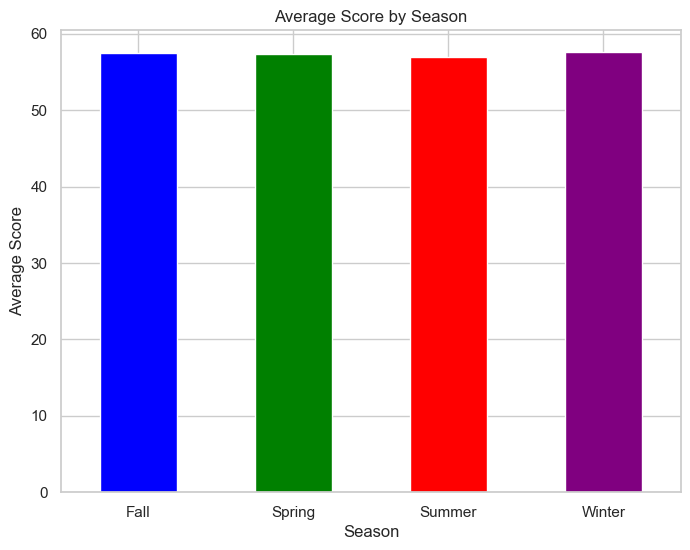

In [51]:
avg_score_by_season = df_full_date.groupby('season')['avg_score'].mean()

print(avg_score_by_season)

plt.figure(figsize=(8, 6))
avg_score_by_season.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Score by Season')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()


Interesting! The average score across different release seasons being similar suggests that the quality of movies, as assessed by critics and audiences, remains relatively consistent throughout the year. This could be due to filmmakers maintaining high production standards year-round, and critic reviews being primarily based on factors like plot, acting, and direction, which are not influenced by the release season. 

Now, let us take a look at the average revenue by season:

season
Fall      1.155038e+07
Spring    1.485746e+07
Summer    2.119703e+07
Winter    1.383414e+07
Name: revenue, dtype: float64


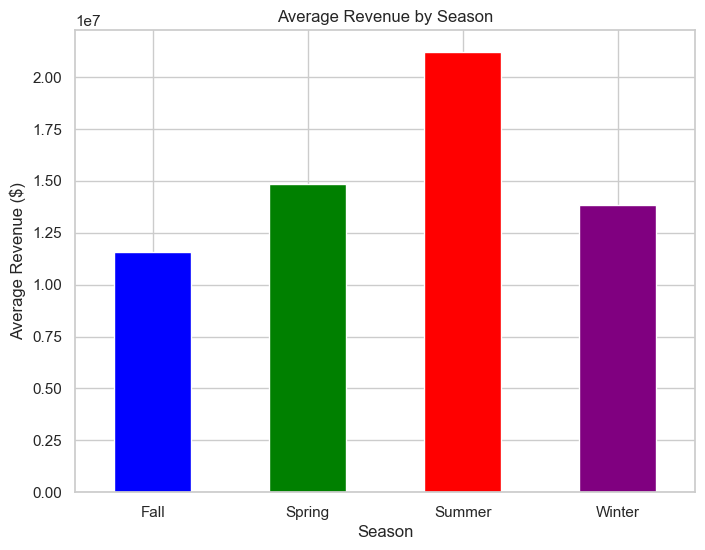

In [52]:
avg_revenue_by_season = df_full_date.groupby('season')['revenue'].mean()

print(avg_revenue_by_season)

plt.figure(figsize=(8, 6))
avg_revenue_by_season.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.show()

The higher revenue in the summer compared to other seasons can be attributed to several factors, with one key element being the summer blockbuster effect. Movie studios often release their most anticipated films during the summer, when school is out and families are more likely to go to the theater. This results in higher audience turnout and larger box office revenues. 

Spring also sees a fair amount of success due to less competition, as some studios release films earlier in the year to capture the attention of moviegoers before the summer rush. 

Winter sees a decline in revenue, likely because audiences are more focused on the holidays and other festive activities, and fewer major releases are scheduled. 

Fall typically has the lowest revenue as movie releases tend to be fewer, with studios holding back major films for the end of the year to align with award seasons. 

Thus, the seasonality in revenue reflects a combination of audience behavior and strategic timing by film studios.

Now let us see the average box office revenue by season:

season
Fall      5.470941e+07
Spring    6.522489e+07
Summer    8.480916e+07
Winter    5.166205e+07
Name: box_office, dtype: float64


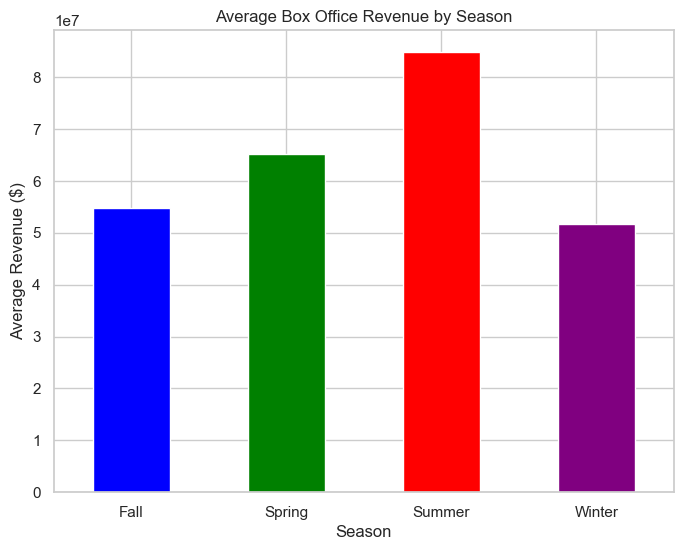

In [53]:
avg_box_office = df_full_date.groupby('season')['box_office'].mean()

print(avg_box_office)

plt.figure(figsize=(8, 6))
avg_box_office.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Average Box Office Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=0)
plt.show()

Box office revenues follow the same trend as overall revenue, with the highest earnings observed in the summer and progressively lower earnings in spring, winter, and fall. It's important to note that box office refers specifically to ticket sales at theaters, while total revenue encompasses all income generated by a movie, including box office earnings, home video sales, merchandising, and licensing deals.

#### Festive Timing 

Let us take a closer look at the revenue by week:

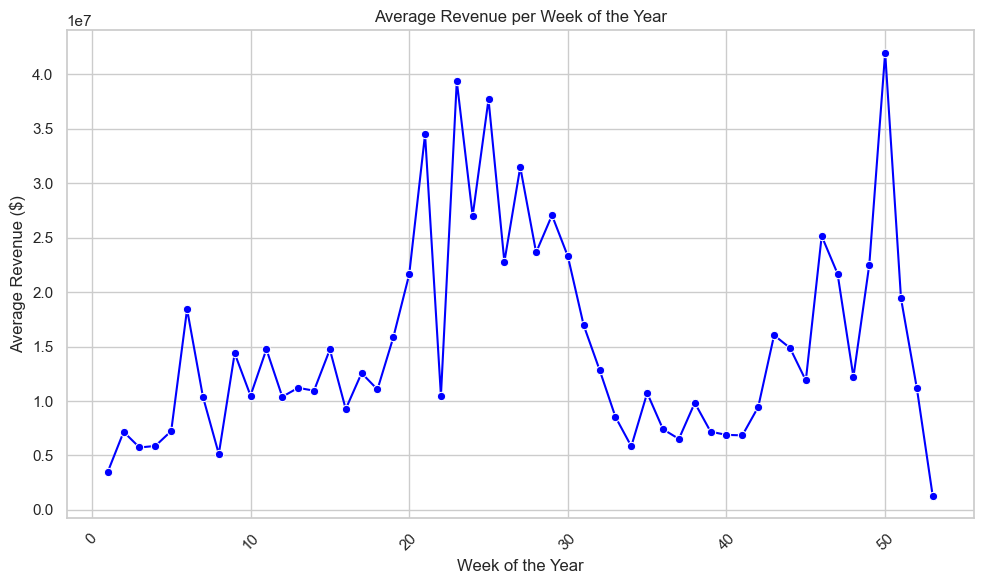

In [54]:
# Extracting the week of the year
df_timing['week_of_year'] = df_timing['release_date'].dt.isocalendar().week

# Grouping by week_of_year and calculating average revenue
avg_revenue_per_week = df_timing.groupby('week_of_year')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='week_of_year', y='revenue', data=avg_revenue_per_week, marker='o', color='blue')
plt.title('Average Revenue per Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Analyzing movie revenue week-by-week reveals notable seasonal spikes and dips throughout the year:

- We see a rise around the 8th week (February), likely coinciding with Valentine’s Day—a popular time for romance-themed releases. A more sustained upward trend appears near the 30th week, around late July, which could reflect summer’s impact as schools break and audiences flock to theaters. However, this is followed by a decrease around week 35 as the school year resumes in early September, reducing moviegoing frequency as people shift focus.

- Later in the year, we observe another peak near week 44, which aligns with Halloween. This holiday season often sees the release of horror and thriller genres, boosting box office revenue. 

- The trend holds slightly around weeks 46–48, likely reflecting American Thanksgiving as families gather and seek entertainment.

- Finally, a major spike occurs in December, aligning with Christmas and New Year’s holidays, a prime season for high-grossing releases as people are on holiday break. 

From these results, we see that while summer generally dominates in terms of both average revenue and box office performance, analyzing the impact of specific holidays throughout the year is essential. Strategic releases during these holidays provide opportunities for targeting specific audiences, such as families during Thanksgiving or couples around Valentine's Day. 

Note: It’s important to note that these observations are influenced by U.S. holidays, as American movies dominate the CMU movies dataset (which we will see in the next section).

#### Section Conclusion

In conclusion, our exploration of release seasonality and timing highlights the influence of both specific holidays and seasonal trends on movie success. While summer releases generally dominate in terms of average revenue and box office performance due to the broader audience availability, examining spikes during holidays such as Valentine’s Day, Halloween, and the winter holiday season shows the additional impact of these cultural touchpoints. These findings suggest that both timing and strategic alignment with major holidays can be leveraged to maximize a movie's reach and revenue potential. 

### Production Country

In this section, we delve into the global landscape of the movie industry, examining key trends in film production, box office performance, language distribution, and genre preferences across the top 20 most influential countries to highlight the regions with the greatest impact and activity in the global film industry.

As mentioned previously, the Box Office Revenue presents a significant challenge, with a large portion of data being null (73,340 missing entries). While we could attempt to use machine learning/data science techniques to predict the missing values, the nature of Box Office Revenue makes it difficult to fill in reliably. This metric is highly dependent on various factors such as distribution, marketing, and cultural context, which aren't easily inferred or predicted with standard data imputation methods. 

Additionally, our helper datasets differ significantly in size (with a maximum of 10k entries compared to over 80k in this dataset), and they do not significantly reduce the number of null values. Therefore, when analyzing box office revenue, we will focus only on the rows where this data is available. We will handle missing data appropriately, without attempting to impute values, as doing so could introduce significant bias or inaccuracies.

#### Global Distribution of Movies by Country

In this subsection, we explore which countries have produced the most movies in this dataset, providing insight into the geographic hubs of film production. For films produced through collaborations across multiple countries, each participating country is credited with one entry, reflecting the collaborative nature of international cinema and the shared contributions to the global film industry. This approach allows us to capture the extent of each country's involvement and influence in movie production.

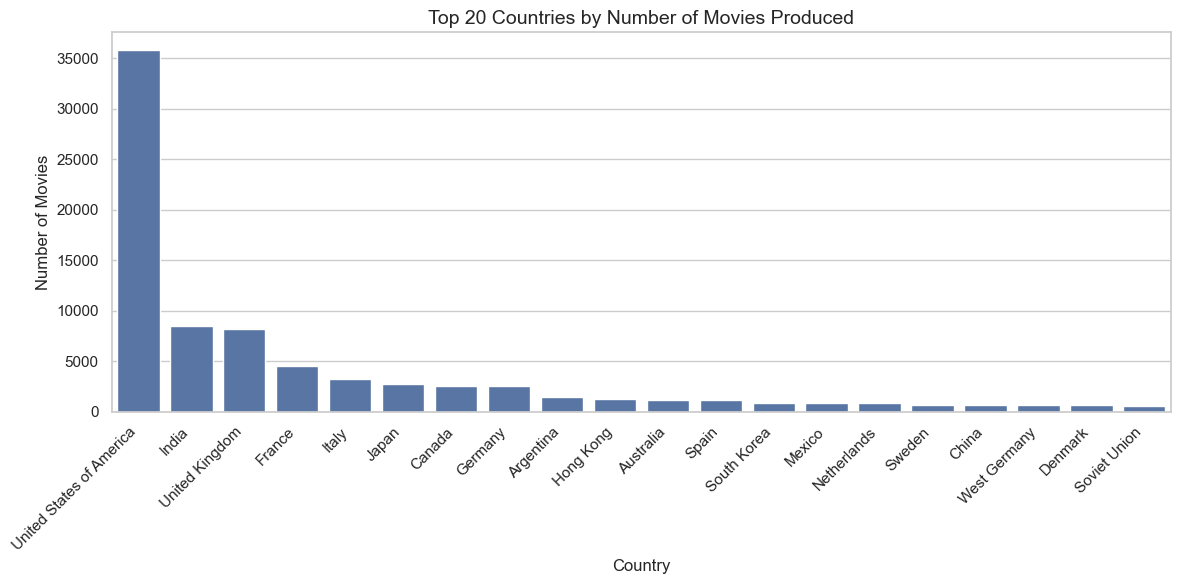

In [55]:
# When there are collaborations, we will "explode" i.e. create a new row but with different country 
if isinstance(df_merged['Country Name'].iloc[0], list):
    df_countries_exploded = df_merged.explode('Country Name')

# Counting the number of movies produced by each country
country_movie_counts = df_countries_exploded['Country Name'].value_counts()

# Taking the top 20 countries
top_countries = country_movie_counts.head(20)

# Plotting our work in a bar graph 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 Countries by Number of Movies Produced', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the plot
plt.show()

These results can be explained by the unique strengths and historical factors of their film industries:

The United States leads significantly due to Hollywood’s global influence, extensive infrastructure, and substantial funding, enabling high film output and widespread distribution. Hollywood’s scale and access to international markets make U.S. films widely accessible and frequently successful worldwide.

India’s Bollywood is the world’s largest film industry by output, driven by high demand from India’s massive, culturally diverse population. Bollywood's focus on genres that resonate deeply within its domestic audience, like musicals and romantic dramas, fuels its substantial production volume.

The United Kingdom, France, and Italy each have deep-rooted film traditions and government-supported cinema, which foster strong domestic production. For instance, France’s film culture, dating back to the invention of cinema, is supported by policies that protect local films, allowing for high-quality output and international acclaim.

#### Box Office Revenue by Country:

In this section, we explore box office revenue across various countries to identify where movies generate the most significant earnings. This analysis highlights the economic powerhouses of the global film market and provides insights into where films are most commercially successful.

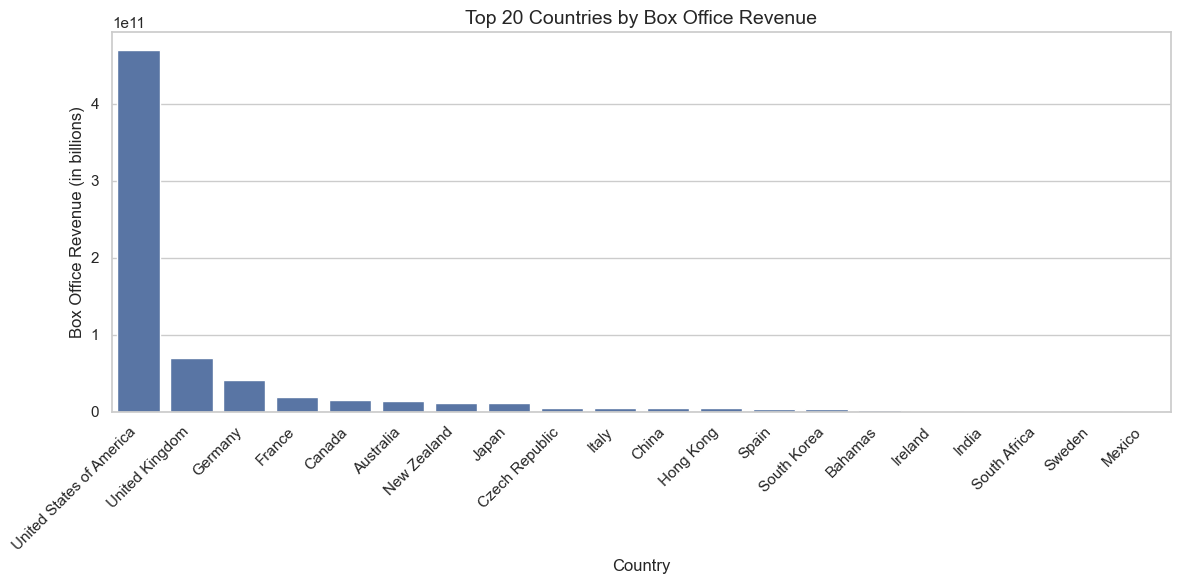

In [56]:
# Convert the 'Box Office Revenue' to numeric, handling non-numeric values
df_countries_exploded['box_office'] = pd.to_numeric(df_countries_exploded['box_office'], errors='coerce')

# Grouping the data by 'Country Name' and sum the box office revenue for each country
country_revenue = df_countries_exploded.groupby('Country Name')['box_office'].sum()

# Sort the countries by box office revenue in descending order and select the top 20
top_countries_revenue = country_revenue.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_revenue.index, y=top_countries_revenue.values)
plt.title('Top 20 Countries by Box Office Revenue', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Box Office Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

It is important to note that the CMU Movies dataset contains a significant amount of missing data, particularly in the box office revenue field. These missing values may influence the results shown below, as the absence of data from certain movies or countries could skew the overall revenue figures. As a result, we observe a general trend that mirrors the movie count by country, with the USA and UK dominating the top spots. A key difference, however, is the noticeable absence of Bollywood's financial contribution, as the dataset lacks box office revenue data for many Indian movies.

#### Language Analysis  

In this section, we analyze the distribution of languages in the global movie industry, exploring how language choices reflect cultural trends and regional preferences. By examining the languages associated with movies in the dataset, we can gain insights into the reach and influence of different linguistic markets within the film industry. This analysis helps us understand which languages are most prominent in global cinema and how they correlate with the production and success of films across various countries.

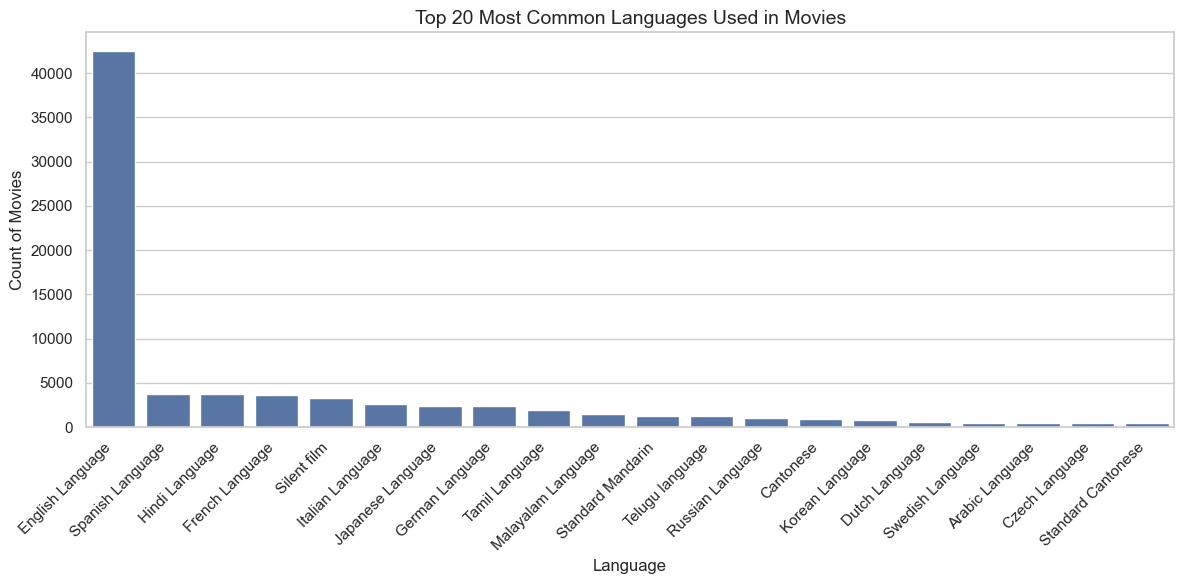

In [57]:
# If 'Language Name' contains lists, then we will explode the column entry
if isinstance(df_merged['Language Name'].iloc[0], list):
    df_countries_exploded_languages = df_merged.explode('Language Name')

# Group by language and count the occurrences
language_counts = df_countries_exploded_languages['Language Name'].value_counts()

# Get the top 20 most common languages
top_20_languages = language_counts.head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_languages.index, y=top_20_languages.values)
plt.title('Top 20 Most Common Languages Used in Movies', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

English dominates significantly in this dataset for two key reasons. First, American movies represent the largest share of films in the dataset, which naturally skews the language distribution toward English. The United States is a major player in global cinema, with Hollywood producing a large volume of internationally distributed films, many of which are in English.

Secondly, English is known as the international language, so more people speak it. The broader trends in global language distribution also help explain why languages like French, Spanish, and Hindi are prominent in the top spots. These languages are not only spoken by large populations but also have significant cultural and media influence. With more viewers speaking these languages, films in these languages have greater opportunities for success both locally and internationally, reinforcing their presence in the dataset. Thus, the dominance of English and other major languages reflects both the volume of films produced and the global reach of these linguistic markets.

Another analysis we can do is to associate languages with the countries where they are most prevalent. By identifying which countries predominantly speak certain languages, we can uncover patterns that link cultural, linguistic, and market dynamics to the success and visibility of films. This analysis is relevant because it helps contextualize the prominence of specific languages in the movie dataset, illustrating how language can influence film popularity and success in different regions.

#### Genre by Country 

In this section, we explore the genre preferences of different countries by analyzing which genres are most prevalent in each region. By examining the distribution of genres across countries, we can gain insights into the cultural tastes, trends, and influences that shape the movie industry in various parts of the world. Understanding genre preferences is crucial for identifying the types of movies that resonate most with audiences in specific regions, and how these preferences may influence a film's success in different markets.

First, we shall examine, in general, what the top genres are across the dataset. This will give us an overview of the most popular genres on a global scale before diving deeper into the preferences of individual countries. 

It's important to note that a movie can belong to more than one genre. As a result, we will "explode" the genre lists—meaning, for each movie, we will treat every genre listed as a separate entry and attribute a +1 count for each genre mentioned. This approach allows us to accurately capture the distribution of multiple genres per movie and gives a clearer picture of genre popularity across the dataset.


In [58]:
# Assuming 'Genre Name' contains a list of genres
df_exploded_genre= df_merged.explode('Genre Name')

# Counting the frequency of each genre
genre_counts = df_exploded_genre['Genre Name'].value_counts()

# Getting the top 20 genres
top_20_genres = genre_counts.head(20)

# Displaying the result
top_20_genres

Genre Name
Drama               35116
Comedy              16715
Romance Film        10684
Black-and-white      9405
Thriller             9227
Action               9121
Short Film           8256
World cinema         7397
Crime Fiction        7186
Indie                7107
Documentary          5748
Horror               5592
Silent film          5352
Adventure            5285
Family Film          4971
Action/Adventure     4832
Comedy film          4406
Musical              4401
Animation            3793
Romantic drama       3506
Name: count, dtype: int64

The results of the genre distribution align with our expectations based on the global film market and audience preferences. Here's a couple of reasons explaining the top genre rankings:

- Drama leading with the highest count is not surprising, as it is a versatile genre that spans multiple themes and attracts a broad range of viewers. Many successful films, from small-scale indie projects to big-budget blockbusters, fall under this category.

- Comedy also ranks highly, reflecting the universal appeal of humor. Comedy films are widely enjoyed across cultures and languages, making them a staple in both mainstream and independent cinema.

- World cinema and Romance Film are also prominent, showcasing the significant demand for films that explore different cultures and universal themes of love, which are always popular globally.

In [59]:
# Explode the genre lists for each country
df_exploded_genre_by_country = df_countries_exploded.explode('Genre Name')

# Grouping by Country and finding the most frequent genre for each country
top_genre_by_country = df_exploded_genre_by_country.groupby('Country Name')['Genre Name'].agg(lambda x: x.mode()[0])

top_20_countries_with_genres = top_genre_by_country.loc[top_countries.index]

# Displaying the result
top_20_countries_with_genres

Country Name
United States of America              Drama
India                                 Drama
United Kingdom                        Drama
France                                Drama
Italy                                 Drama
Japan                       Japanese Movies
Canada                                Drama
Germany                               Drama
Argentina                   Black-and-white
Hong Kong                    Chinese Movies
Australia                             Drama
Spain                                 Drama
South Korea                           Drama
Mexico                                Drama
Netherlands                           Drama
Sweden                                Drama
China                        Chinese Movies
West Germany                          Drama
Denmark                               Drama
Soviet Union                          Drama
Name: Genre Name, dtype: object

The results indicating that 'Drama' is the most frequent genre in many of the top movie-producing countries make sense when considering the global popularity and versatility of the genre.

However, the genres 'Japanese Movies' and 'Chinese Movies' are not quite fitting in the same way as genres like 'Comedy' or 'Action.' These terms represent the origin of the movie rather than a specific genre of storytelling. To get a clearer picture of the most popular genres in these countries, let's examine the second most common genre for each.

In [60]:
# Explode the genre lists for each country
df_exploded_genre_by_country = df_countries_exploded.explode('Genre Name')

# Grouping by Country and finding the most frequent genre for each country
second_top_genre_by_country = df_exploded_genre_by_country.groupby('Country Name')['Genre Name'].agg(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)

# Get the second most common genre for the top 20 countries
top_20_countries_with_second_genres = second_top_genre_by_country.loc[top_countries.index]

# Displaying the result
top_20_countries_with_second_genres

Country Name
United States of America          Comedy
India                       World cinema
United Kingdom                    Comedy
France                      World cinema
Italy                       World cinema
Japan                              Drama
Canada                          Thriller
Germany                     World cinema
Argentina                          Drama
Hong Kong                   World cinema
Australia                   World cinema
Spain                       World cinema
South Korea                 World cinema
Mexico                       Comedy film
Netherlands                       Comedy
Sweden                      World cinema
China                              Drama
West Germany                World cinema
Denmark                           Comedy
Soviet Union                World cinema
Name: Genre Name, dtype: object

The second most common genres in the top 20 movie-producing countries—such as Comedy and World Cinema—make more sense when considering global film trends. These genres align better with worldwide audience preferences than labels like Chinese Movies and Japanese Movies, which are more about the origin of films rather than their thematic content, making the second most common genres a more meaningful reflection of global tastes.


#### Section Conclusion

In this section, we examined the global distribution of movies by country, language, and genre to uncover patterns that influence a movie’s potential for success. 

The dominance of countries like the United States in movie production is largely due to the global reach of the English language, the world's most spoken and widely understood language, which provides access to a vast audience.

Additionally, countries with strong cultural industries, such as India and the United Kingdom, reflect the significance of local languages like Hindi and English in broadening a film's reach. On the other hand, the prevalence of genres like Drama, Comedy, and World Cinema underscores global viewing preferences and highlights the importance of cultural relevance in movie success. 

In the end, the link between popular genres, languages, and movie production by country shows that a larger, more diverse audience increases the likelihood of a movie's success. By recognizing these patterns, we can better predict which types of films will appeal to viewers in different regions, highlighting that cultural context and language are key to a movie's success.

### TV Tropes

This section explores the connection between the presence of TV tropes in movies and their success, analyzing how certain recurring narrative patterns may influence audience reception and overall performance.

Firstly, let us load the necessary pickles:

In [61]:
tropes_df = pd.read_pickle('pickles/tropes_df.pkl')
characters_df = pd.read_pickle('pickles/character_metadata.pkl')
# cmu_movies_df = pd.read_pickle('../../pickles/cmu_movies_df.pkl')
# movie_scores = pd.read_pickle('../../pickles/movie_scores.pkl')

Now, let us merge the datasets containing TV tropes, character information, movie details, and success metrics to create a unified dataset for analysis.

movie score=merged
cmu_movies_df = df_cmu_movies

In [62]:
# left join tropes and characters
tropes_chars_df = pd.merge(tropes_df, characters_df, on='character_actor_map_id', how='left')

# left join tropes + characters and movies
df_merged.rename(columns={'Freebase Movie ID': 'freebase_movie_id'}, inplace=True)
tropes_all = pd.merge(tropes_chars_df, df_merged, on='freebase_movie_id', how='left')

tropes_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   char                    702 non-null    object        
 1   movie                   702 non-null    object        
 2   character_actor_map_id  702 non-null    object        
 3   actor                   702 non-null    object        
 4   trope                   702 non-null    object        
 5   wikipedia_movie_id      702 non-null    int64         
 6   freebase_movie_id       702 non-null    object        
 7   movie_release_date      702 non-null    object        
 8   character_name          702 non-null    object        
 9   actor_dob               700 non-null    object        
 10  actor_gender            701 non-null    object        
 11  actor_height            618 non-null    float64       
 12  actor_ethnicity_id      428 non-null    object    

#### Cleaning Trope Data

We begin by visualizing the columns with missing values, followed by determining the appropriate handling strategies for them.

In [63]:
# Importing the necessary librairies
import sys
sys.path.append('src/utils/')

import tropes_utils

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


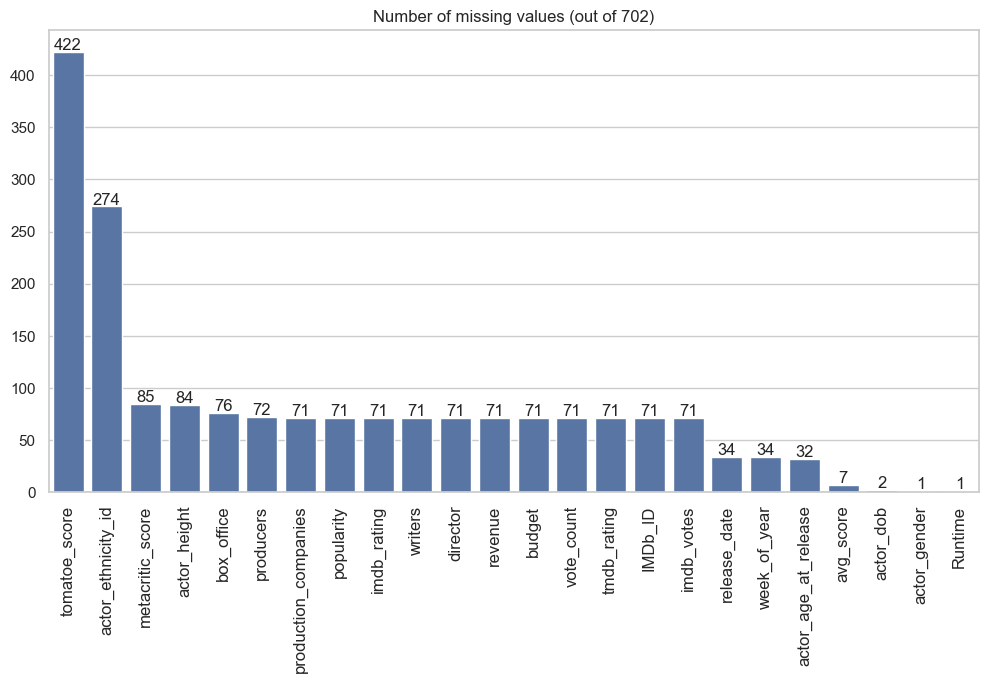

In [64]:
tropes_utils.plot_missing_data(tropes_all)

There are many missing here and there, but not all of these columns are valuable to us. Let's remove the unnecessary ones:

In [65]:
tropes_scores = tropes_all[['char', 'movie', 'actor', 'trope', 
                                'actor_gender', 
                                'actor_age_at_release', 'actor_dob', 'Release Date',  
                                'box_office', 'Runtime', 'Language Name',
                                'Country Name', 'Genre Name',
                                'tomatoe_score', 'imdb_rating', 'budget', 'revenue', 'metacritic_score']]

#### Enriching Trope Data

We have the actor's date of birth in actor_dob and the Release Date, so we can use these to fill in the missing values in actor_age_at_release.

/var/folders/jm/kpgxt7bx5qjd7x3dffymccd80000gn/T/ipykernel_98139/346884787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropes_scores.drop(columns=['actor_dob'], inplace=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


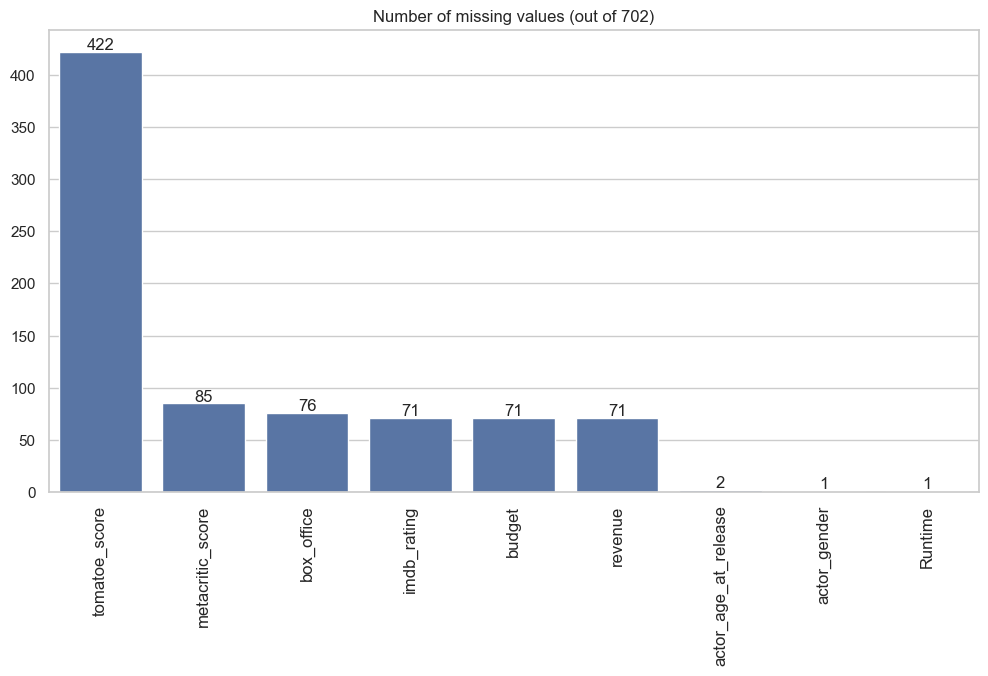

In [66]:
# Identifying rows with missing values in 'actor_age_at_release'
filter = tropes_scores['actor_age_at_release'].isna()
missing_age = tropes_scores[filter]

# Replacing missing 'actor_age_at_release' by calculating the actor's age at the time of release
tropes_scores.loc[filter, 'actor_age_at_release'] = missing_age.apply(
    lambda row: (pd.to_datetime(row['Release Date']).year - pd.to_datetime(row['actor_dob']).year)
    if pd.notnull(row['actor_dob']) else np.nan,  # Calculate age if 'actor_dob' is not null
    axis=1
)

# Dropping the 'actor_dob' column after filling in missing 'actor_age_at_release' values
tropes_scores.drop(columns=['actor_dob'], inplace=True)

# Plot missing data to visualize any remaining gaps in the dataset
tropes_utils.plot_missing_data(tropes_scores)


We have successfully filled in the missing values for the actor's age. Please note that the calculated age may differ by one year, as we based the calculation solely on the year of birth and release, without accounting for the exact birthdate.

#### Trope Analysis Plan

Now that we have a clear understanding of the data, we can proceed with the analysis. I will begin by outlining the key relationships we are examining, followed by a presentation of the results.



**General Analysis**

1. Visualize the number of movies each trope appears in.

2. Display the gender distribution for each trope.

3. Plot the age distribution for each trope.

4. Explore the relationship between tropes and movie runtime.

**Financial Success Analysis**

5. Identify which tropes have missing box office data. 

6. Plot the total gross revenue for each trope, divided by the number of characters it features. 

7. Create a heatmap to analyze the relationship between tropes and movie genres with box office performance. 

8. Visualize the relationship between tropes and gender in relation to box office performance using a heatmap. 

9. Examine the relationship between tropes and actor age. 

10. Rank the results and provide a summary of findings.

**Positive Audience Reception**

Repeat the analyses from the financial success section, but using score_imdb and score_meta instead of box office revenue (both separately and combined).


#### General Analysis

The goal of this subsection is to familiarize ourselves with the tropes dataset. This foundational step is essential before proceeding with further analysis and drawing meaningful conclusions.

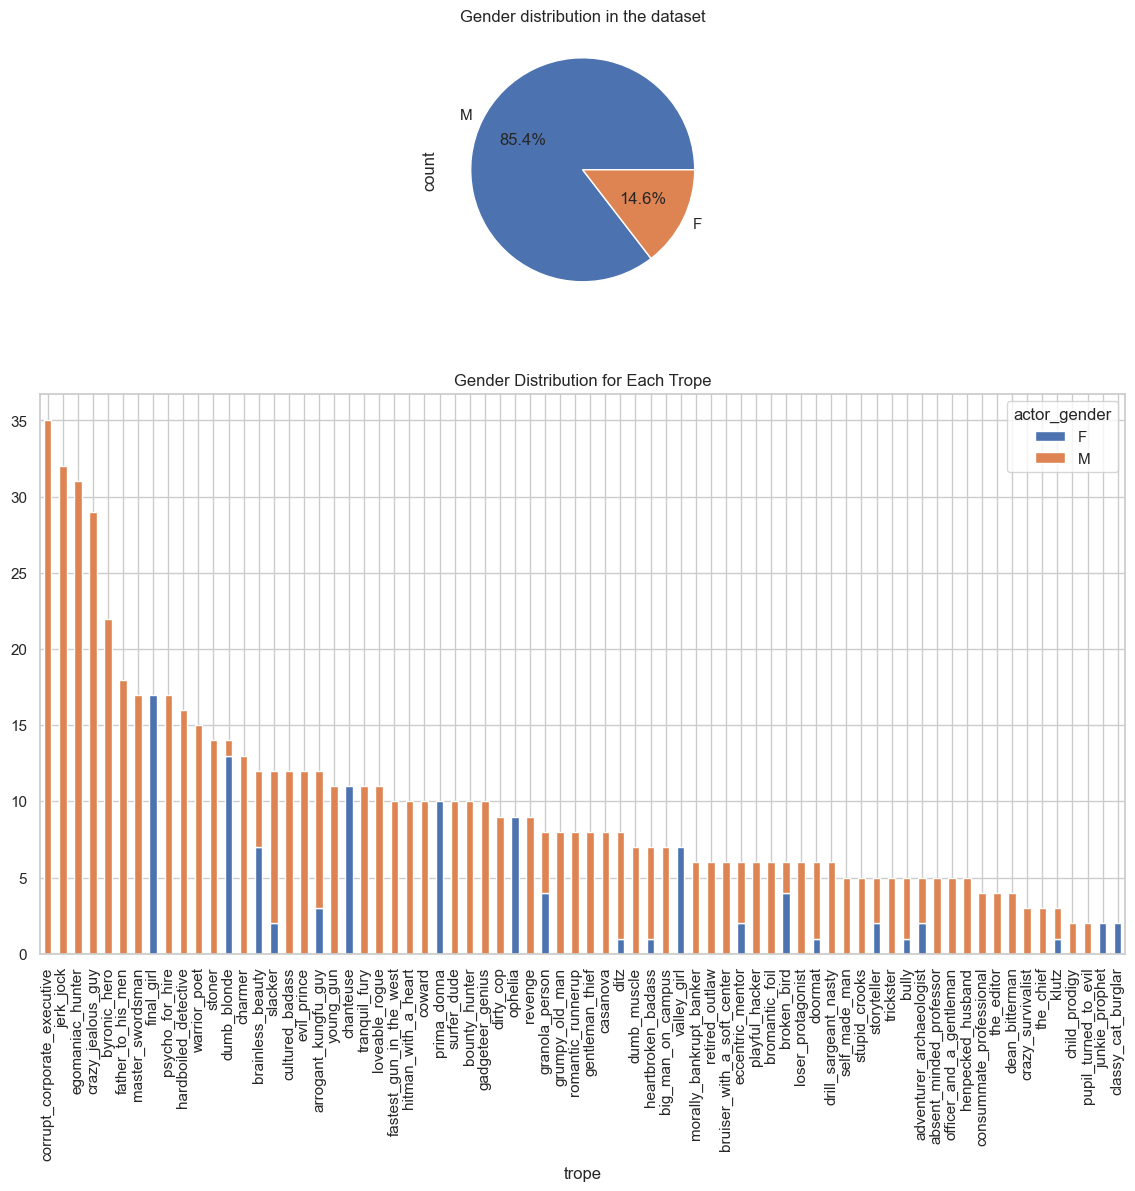

In [67]:
tropes_utils.plot_gender_distribution(tropes_scores)

Count & Gender: The first two plots highlight a striking gender imbalance in the representation of tropes in our dataset. Specifically, 85.4% of the tropes are predominantly associated with men, indicating a very significant gender disparity. This suggests that, in the context of the dataset, men are overwhelmingly represented in these tropes, which could potentially influence the analysis of success related to gender.

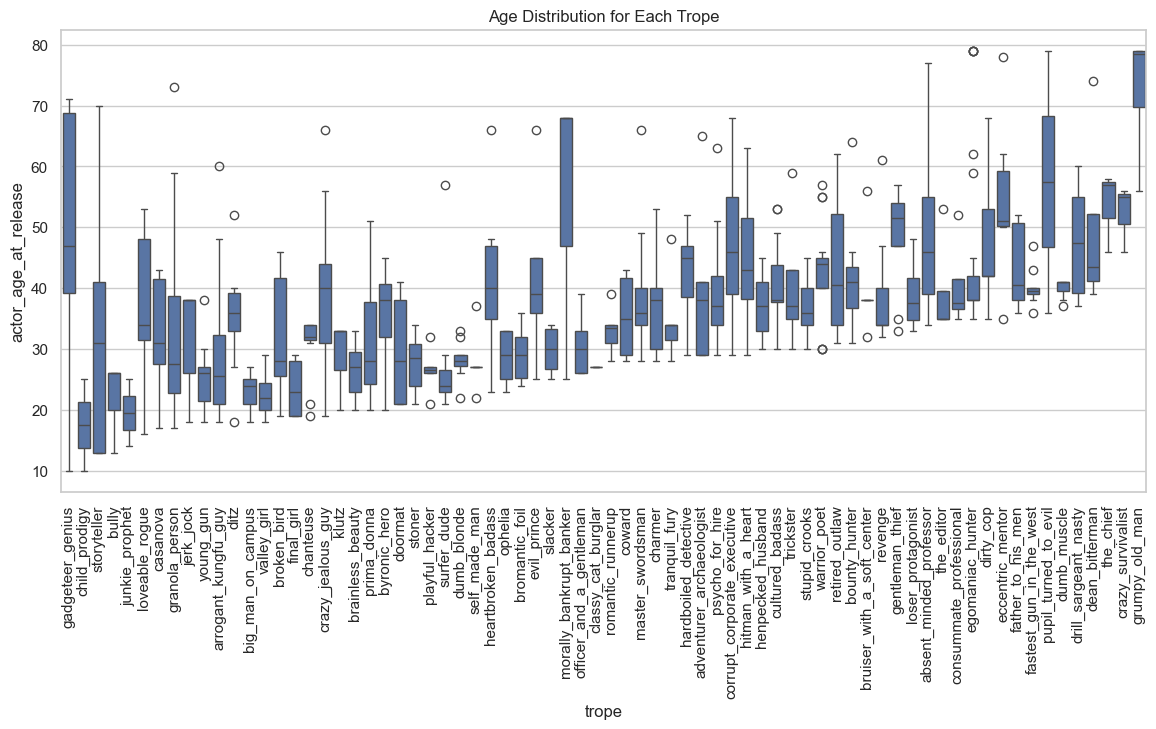

In [69]:
tropes_utils.plot_age_distribution(tropes_scores)

Age: The plot examining age reveals a potential relationship between tropes and actor age. However, the variance in age is high, meaning there is considerable fluctuation in how age is distributed across different tropes. This variability could make it challenging to draw definitive conclusions without further analysis. One way to refine this would be to focus on the tropes with the lowest variance in age, as they may yield more consistent and reliable results in terms of their relationship with success.

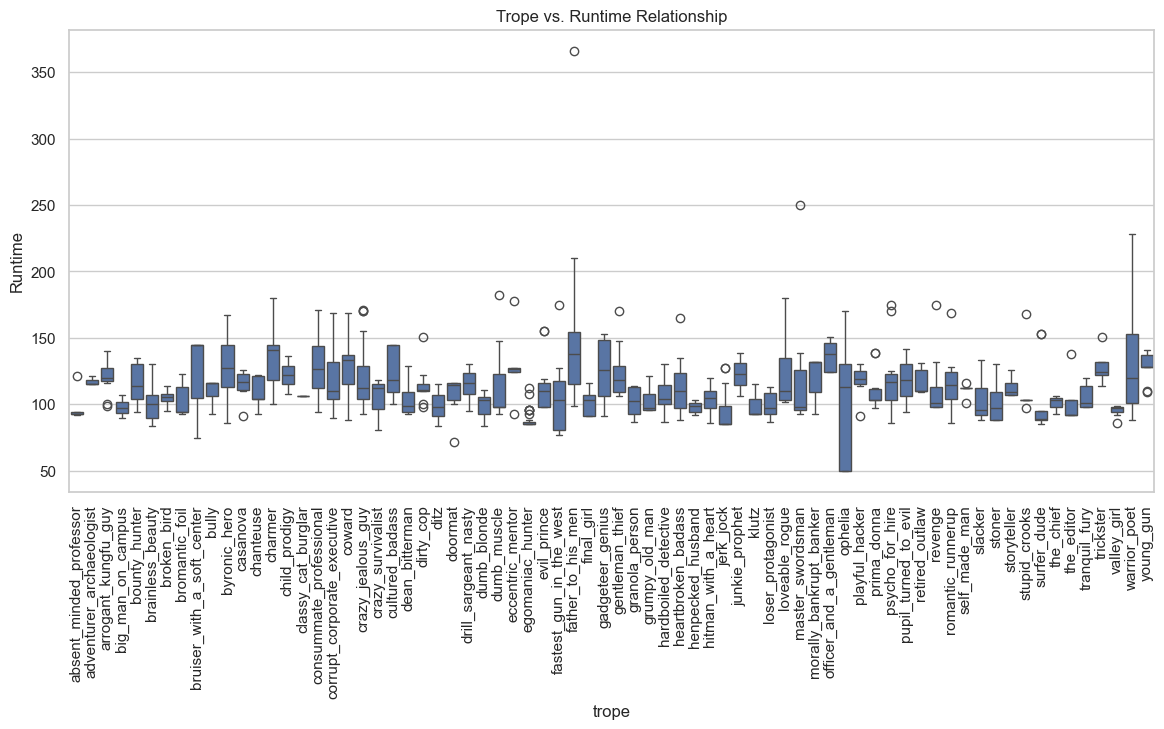

In [70]:
tropes_utils.plot_runtime_distribution(tropes_scores)

Runtime: When examining the relationship between tropes and movie runtime, it appears that most tropes appear in movies with similar runtimes. Given this, it seems that runtime does not significantly impact the presence or success of specific tropes. As a result, this variable may be irrelevant to the analysis and could be excluded in future models.

#### Financial Sucess

Let us first examine how many box office entries there are missing:

/Users/danashay./Desktop/EPFL 2024-2025/Fall 2024/Applied data analysis/Project M2/ada-2024-project-bluesweater/src/utils/tropes_utils.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, trope_counts['Box Office Not Missing'][i] + trope_counts['Missing Box Office'][i] + 0.5, int(missing*100), fontsize='xx-small', ha='center')


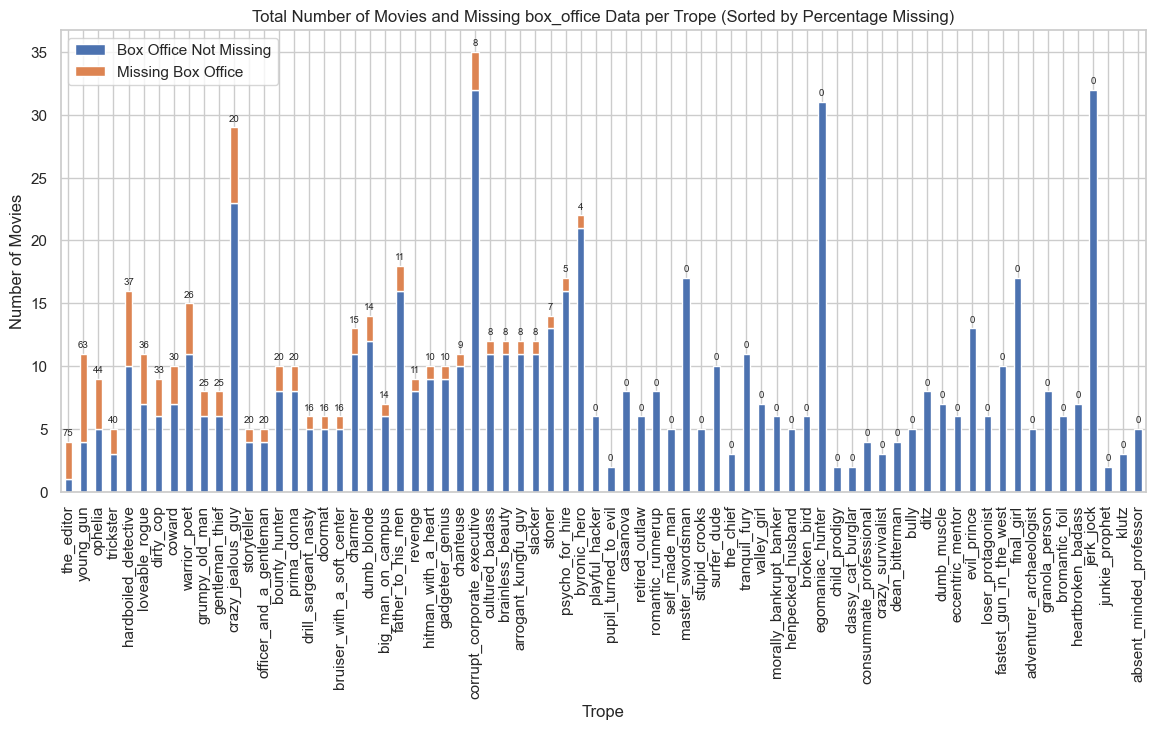

In [71]:
tropes_utils.plot_success_metric_missing(tropes_scores)

For each trope, we can observe that at least some movies still contain box office information, which is the most critical data point for our analysis.

The initial tropes dataset consists of approximately 700 samples. As such, it's important to recognize that the results we derive may not be fully generalizable to all movies. Nevertheless, it remains valuable to explore which tropes are associated with the highest box office revenue. Let’s delve into this analysis.

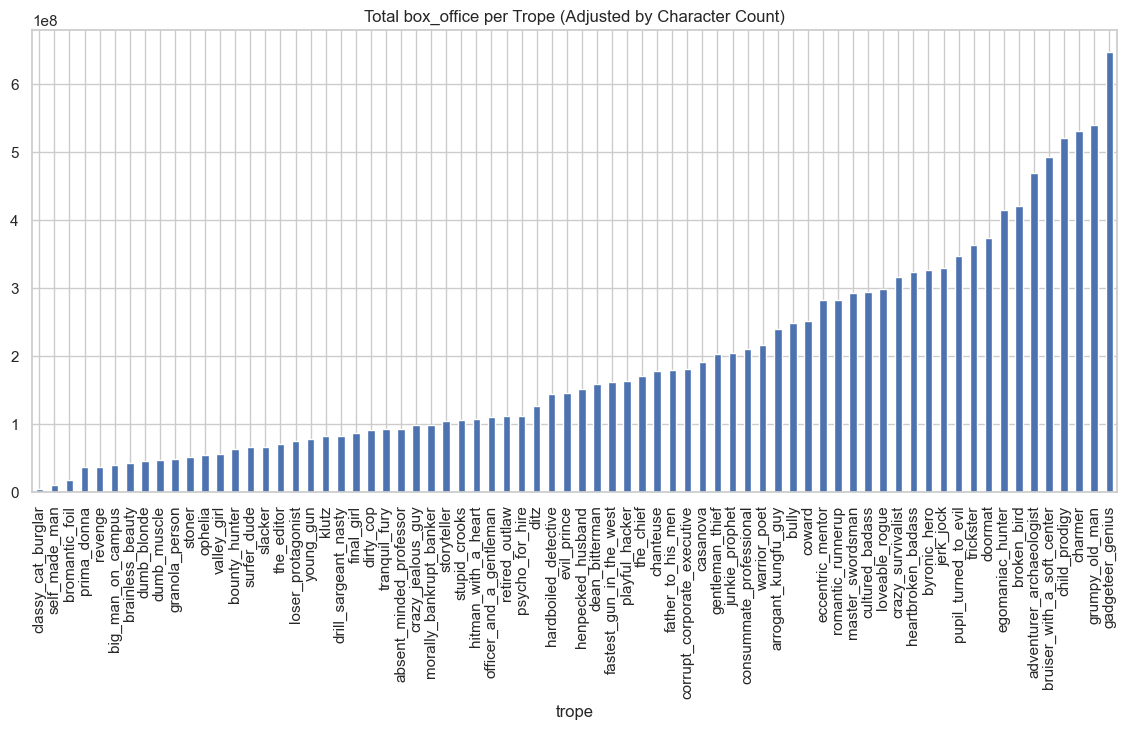

In [72]:
tropes_utils.plot_success_metric_per_trope(tropes_scores)

Let us see what the top 5 most profitable tropes are:

In [73]:
tropes_utils.show_most_successful_tropes(tropes_scores, items=5)

trope
gadgeteer_genius              647179205
grumpy_old_man                539195924
charmer                       530069451
child_prodigy                 519998348
bruiser_with_a_soft_center    491920000
Name: box_office, dtype: int64


#### Critics Analysis

Now, let us look at the movie ratings and discover the top tropes there:

/Users/danashay./Desktop/EPFL 2024-2025/Fall 2024/Applied data analysis/Project M2/ada-2024-project-bluesweater/src/utils/tropes_utils.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, trope_counts['Box Office Not Missing'][i] + trope_counts['Missing Box Office'][i] + 0.5, int(missing*100), fontsize='xx-small', ha='center')


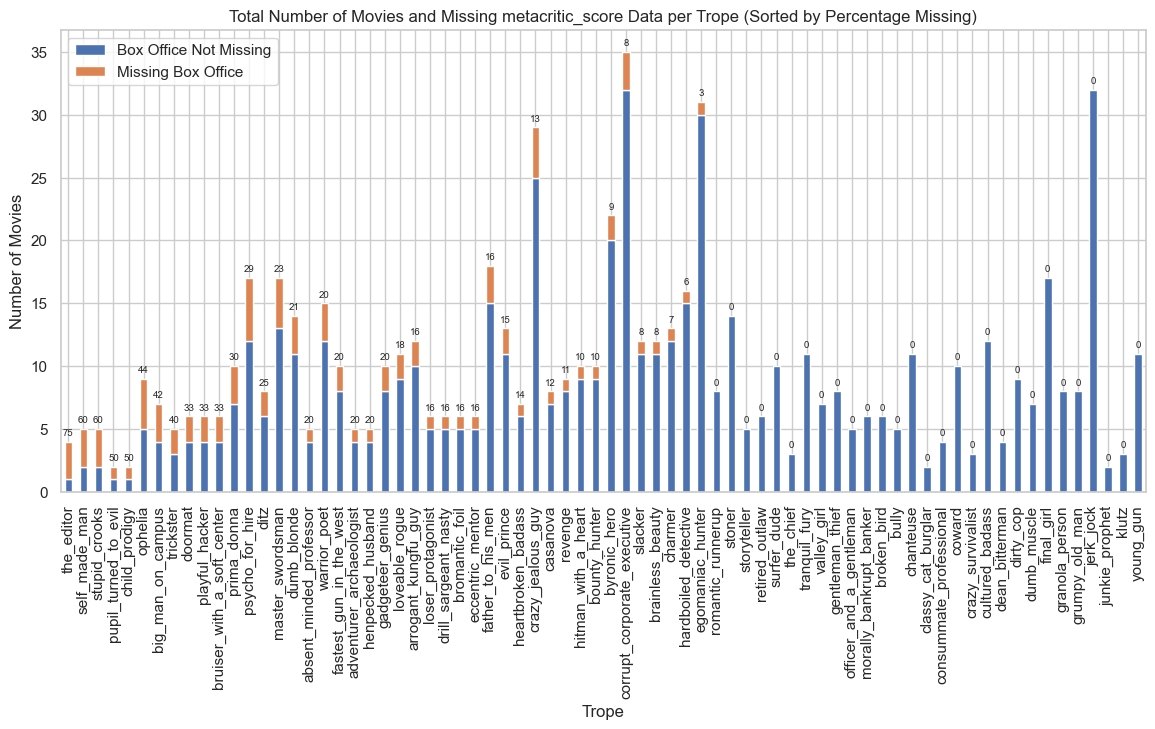

In [74]:
tropes_utils.plot_success_metric_missing(tropes_scores, success_metric='metacritic_score')

Each trope has at least one example, which is crucial for our analysis at this stage. However, it's important to note that the comparison isn't entirely accurate, even for the top movies, unfortunately.



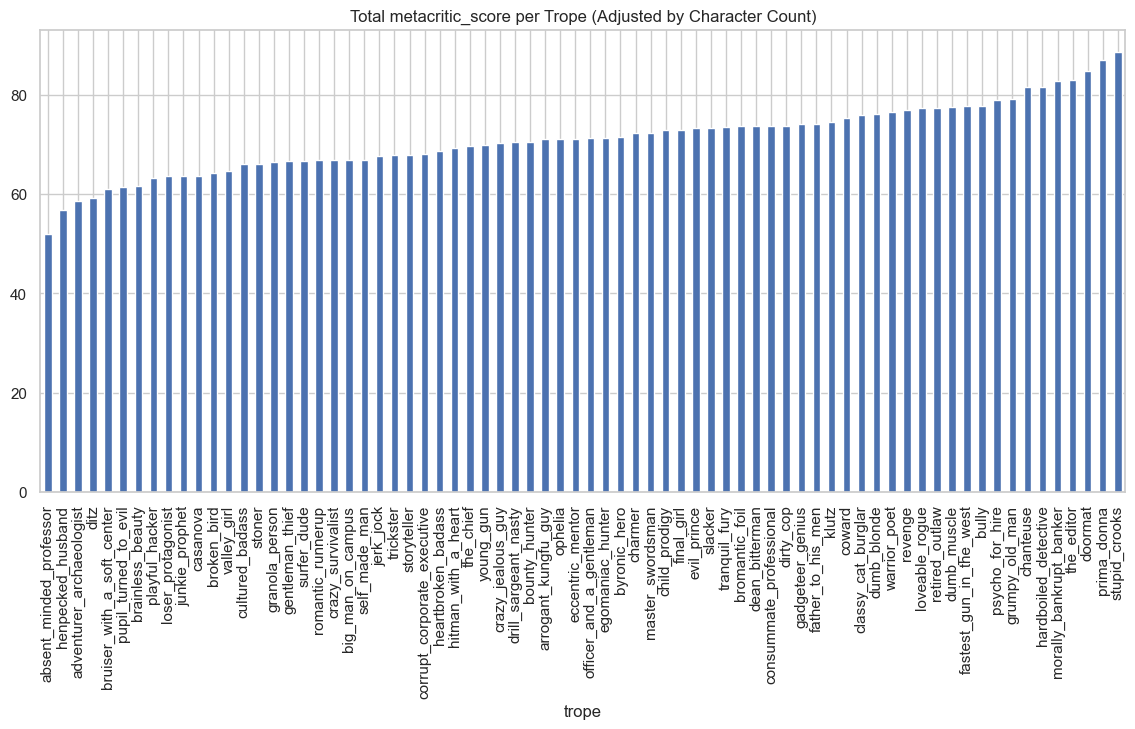

In [75]:
tropes_utils.plot_success_metric_per_trope(tropes_scores, success_metric='metacritic_score')

In [76]:
tropes_utils.show_most_successful_tropes(tropes_scores, items=10, success_metric='metacritic_score')

trope
stupid_crooks              88
prima_donna                87
doormat                    84
the_editor                 83
morally_bankrupt_banker    82
hardboiled_detective       81
chanteuse                  81
grumpy_old_man             79
psycho_for_hire            79
bully                      77
Name: metacritic_score, dtype: int64


The Metacritic score ranges from 0 to 100. We observe that all the movies in this dataset have scores above 50, but only seven movies have scores above 80 as seen above. These are:

Among them, stupid_crooks has the highest score! Unfortunately, there is no overlap between these top-scoring movies and the movies with the highest box office gross.

#### Audience Reception Analysis
Lastly, we will look at the audience ratings and see which tropes rank best. We will be using IMDb scores for that.

/Users/danashay./Desktop/EPFL 2024-2025/Fall 2024/Applied data analysis/Project M2/ada-2024-project-bluesweater/src/utils/tropes_utils.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, trope_counts['Box Office Not Missing'][i] + trope_counts['Missing Box Office'][i] + 0.5, int(missing*100), fontsize='xx-small', ha='center')


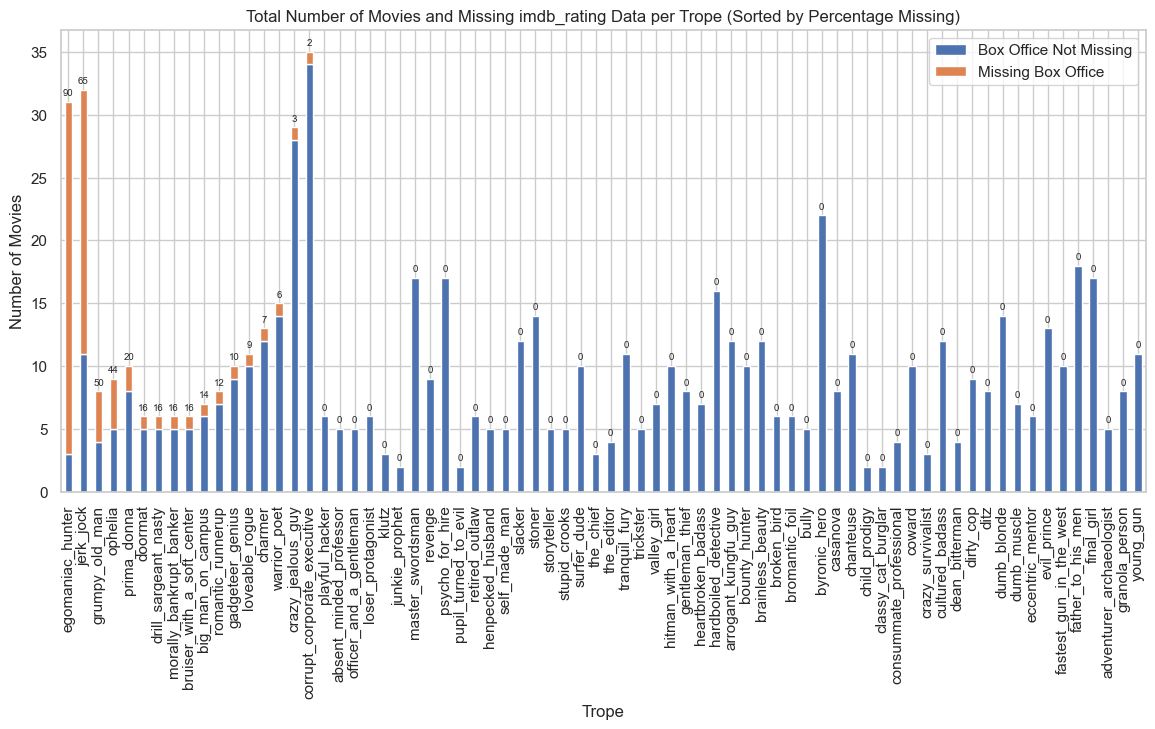

In [77]:
tropes_utils.plot_success_metric_missing(tropes_scores, success_metric='imdb_rating')

Again, having a more complete datasaet would be ideal, but atleast some data is present for each trope.

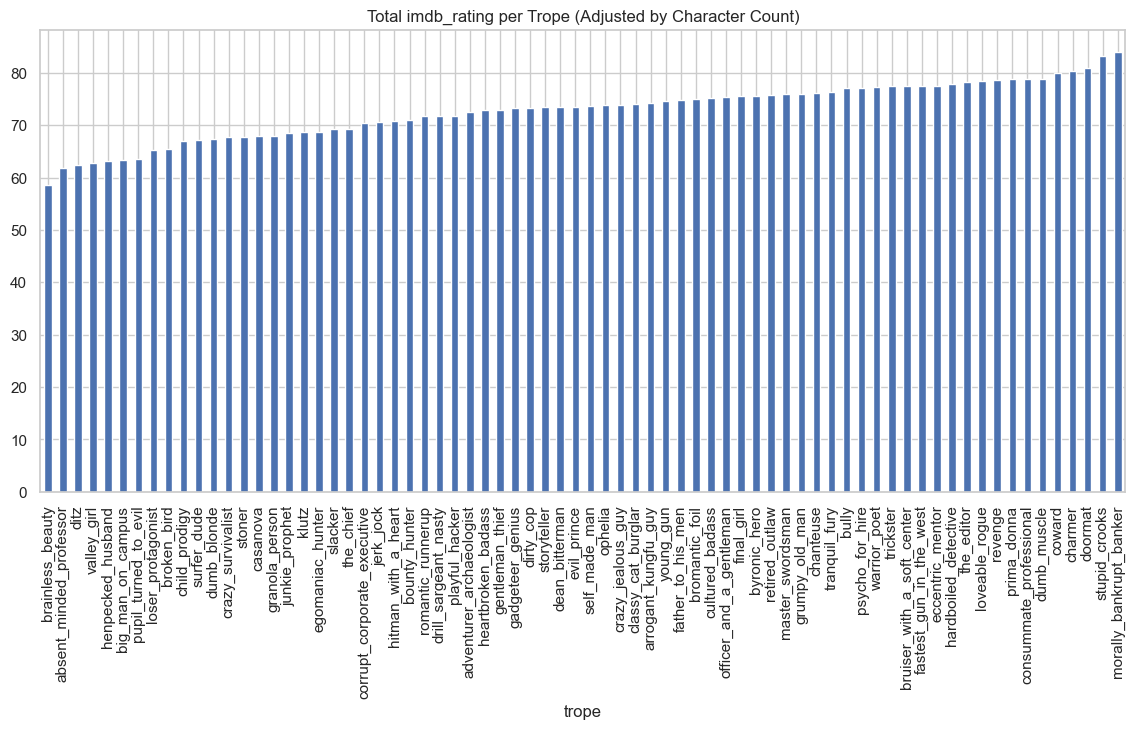

In [78]:
tropes_utils.plot_success_metric_per_trope(tropes_scores, success_metric='imdb_rating')

In [90]:
tropes_utils.show_most_successful_tropes(tropes_scores, items=5, success_metric='imdb_rating')

trope
morally_bankrupt_banker    84
stupid_crooks              83
doormat                    81
charmer                    80
coward                     80
Name: imdb_rating, dtype: int64


The winner closely mirrors the Metacritic rankings! stupid_crooks takes second place, just one point behind, while morally_bankrupt_banker claims the top spot. Interestingly, both characters are criminals who resonate with both critics and audiences. Quite intriguing!

#### Section Conclusion

Our analysis of movie tropes in relation to success reveals several intriguing patterns. We found that certain tropes, such as morally_bankrupt_banker and stupid_crooks, not only appeal to audiences but also receive favorable critical reception, contributing to their success. However, the relationship between tropes and box office performance is complex, with no clear-cut winners across all categories. Additionally, factors such as age, gender, and Metacritic scores show varying degrees of influence on a movie's success, suggesting that while some tropes correlate with higher revenue and audience ratings, the success of a film is shaped by a mix of elements rather than a single trope or characteristic.

## Regression Analysis 

To support our section choices above, we try to quantify the linear relationship between various covariates and the success metric of choice. By success metric, we mean box office / IMDb ratings / number of oscars / revenue / metacritic rating.

We will do regression analysis on **2 success metrics**:
1. IMDb rating
2. box office

These 2 metrics were chosen, because each of them represents a different perspective. IMDb for audience reception and box office represents the profit from the tickets.

#### Prepare DataFrame for regression
- Encode categorical variables (to numeric)
- Drop NaN rows & outliers
- Fix naming and types
- Standardize non-categorical variables
- Drop unnecessary covariates
- Remove covariates with high correlation

##### Encode the categorical variables
We can only use numeric covariates for regression, therefore we encode the non-numeric variables.

In [79]:
from scipy.stats import zscore

import sys
sys.path.append('./src/utils')

from regression_analysis_helpers import one_hot_encode_month, frequency_encode, format_release_date

movies_regression = pd.read_pickle('./pickles/cmu_imdb_tmdb_wikidata_merged.pkl')

# encode categorical variables
movies_encoded = format_release_date(movies_regression)
movies_encoded = one_hot_encode_month(movies_encoded)
movies_encoded = frequency_encode(movies_encoded, columns=['production_companies', 'director', 'writers', 'producers']) # tmdb columns

What encoding did we choose?

The function `format_release_date(df)` extracts year, month and day from the *Release Date* column.

We then choose to do **one hot encoding** for the **month** & **frequency encoding** for the **other categorical variables** (producers, writers, etc.). Frequency encoding takes the total number of occurrences of the attributes in particular cell. For example if a movie M is directed by directors d1 & d2, where d1 is a director of 10 movies and d2 director of 20 movies, then the director_frequency_encoding assigned to movie M would be 10 + 20 = 30.

Alternative to frequency encoding is **target encoding**. However, it would directly utilize the target variable, so that would be "cheating" in a sense. Target encoding could be used, if we **split** the data into **train and test** data.

In [ ]:
# Unwrapping & counting the lists in 'Language Name' column
all_languages = movies_encoded['Language Name'].explode()
unique_languages = all_languages.nunique()
print(f'The number of unique language names is: {unique_languages}')

# Unwrapping & counting the lists in 'Country Name' column
all_countries = movies_encoded['Country Name'].explode()
unique_countries = all_countries.nunique()
print(f'The number of unique country names is: {unique_countries}')

# Unwrapping & counting the lists in 'Genre Name' column
all_genres = movies_encoded['Genre Name'].explode()
unique_genres = all_genres.nunique()
print(f'The number of unique genre names is: {unique_genres}')

The number of unique language names is: 207
The number of unique country names is: 147
The number of unique genre names is: 363


Above, the number of distinct languages, countries and genres is too high to use one-hot-encoding. we will therefore use different encoding instead.

In [82]:
# transforming language, country & genre to a ', ' separated string instead of a list
movies_encoded['Language Name'] = movies_encoded['Language Name'].apply(lambda x: ', '.join(x))
movies_encoded['Country Name'] = movies_encoded['Country Name'].apply(lambda x: ', '.join(x))
movies_encoded['Genre Name'] = movies_encoded['Genre Name'].apply(lambda x: ', '.join(x))

# frequency encode
movies_encoded = frequency_encode(movies_encoded, columns=['Language Name', 'Country Name', 'Genre Name'])

We may either frequency encode the language and country or add boolean variables for when the movie uses **English Language** and also when the movie is from **United States of America** since these are the most dominant ones.

When it comes to **genre**, frequency encoding seems to be our best option right now, but performing some form of clustering to reduce the amount of classes, followed by boolean encoding would be an ideal option to keep the most information in the data.

##### Drop missing rows & outliers

In [83]:
# Calculating the average runtime
average_runtime = movies_encoded['Runtime'].mean()

# Replacing missing runtime values with the average runtime
# movies_encoded['Runtime'].fillna(average_runtime, inplace=True)

# Dropping all rows where runtime is NaN
movies_encoded.dropna(subset=['Runtime'], inplace=True)

# Dropping movies with runtime greater than or equal to runtime_threshold (remove outliers - e.g. TV series)
runtime_threshold = 400
movies_encoded = movies_encoded[movies_encoded['Runtime'] < runtime_threshold]

##### Fix naming & types

In [84]:
# Fixing the naming to use '_' instead of ' '
movies_encoded.columns = movies_encoded.columns.str.replace(' ', '_')

# Transforming all boolean columns to integers
bool_columns = movies_encoded.select_dtypes(include='bool').columns
movies_encoded[bool_columns] = movies_encoded[bool_columns].astype(int)

##### Standardize non-categorical variables

In [85]:
columns_to_standardize = ['Runtime', 'production_companies_frequency_encoded',
                          'director_frequency_encoded', 'writers_frequency_encoded', 
                          'producers_frequency_encoded', 'Language_Name_frequency_encoded', 
                          'Country_Name_frequency_encoded', 'Genre_Name_frequency_encoded']

# Standardizing the specified columns using z-score
movies_encoded[columns_to_standardize] = movies_encoded[columns_to_standardize].apply(zscore)

##### Drop unnecessary columns

In [86]:
# Dropping unnecessary columns
columns_to_drop = ['director', 'writers', 'producers', 'production_companies', 
                   'Language_Name', 'Country_Name', 'Genre_Name',
                   'Box_Office_Revenue', 'Movie_Name', 'Release_Date',
                   'Release_Month', 'Release_Day', 'IMDb_ID',
                   'vote_average', 'vote_count', 'imdb_rating', 'imdb_votes',
                   'Wikipedia_Movie_ID', 'Freebase_Movie_ID', 
                   'Language_Freebase_ID', 'Country_Freebase_ID', 'Genre_Freebase_ID', 
                   'revenue', 'budget', 'popularity']

features = movies_encoded.drop(columns=columns_to_drop)

##### Drop covariates with high correlation

We first plot the correlation matrix to identify such covariates

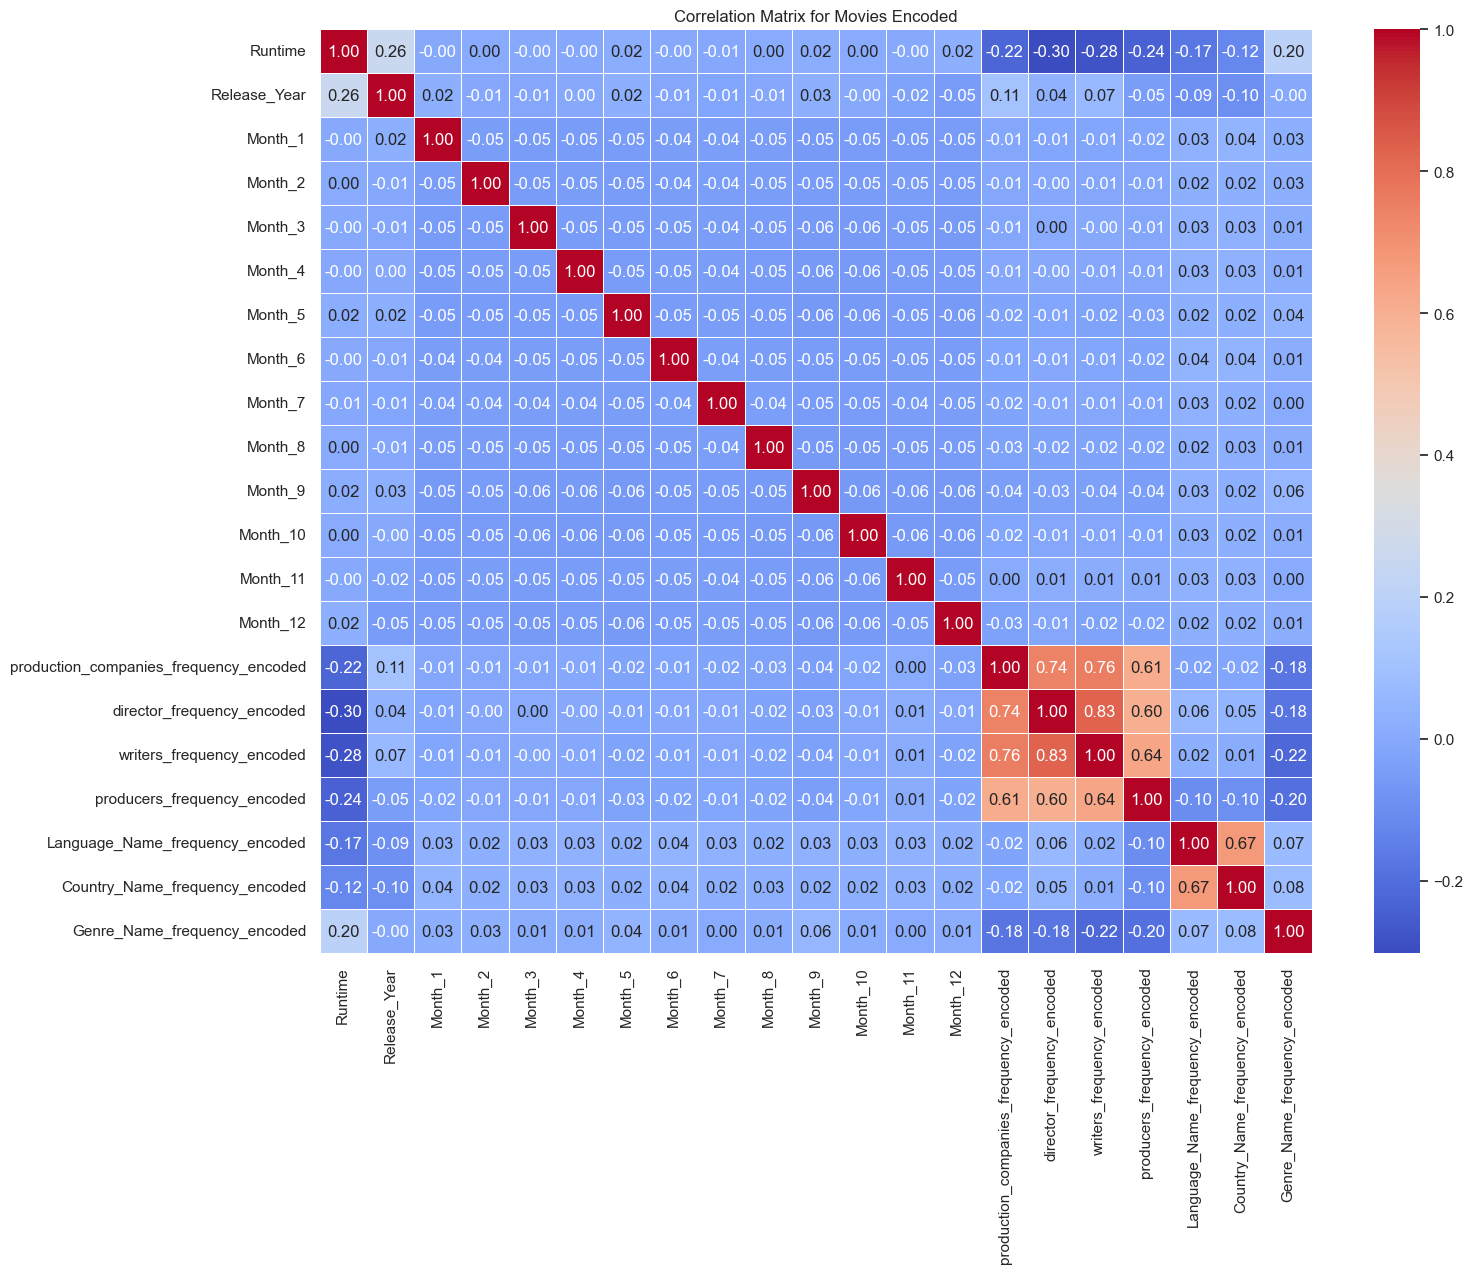

In [87]:
# Computing the correlation matrix
corr_matrix = features.corr()

# Showing the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Movies Encoded')
plt.show()

Our analysis reveals minimal correlation between most variables, with two notable clusters:

Director, Writers, Producers, and Production Companies: These columns show a high correlation after frequency encoding. This is likely because renowned directors often collaborate with well-known writers, producers, and production companies.

Language and Country: A strong correlation exists between these variables, as countries typically use their predominant language in film production.

To streamline our analysis, we included only a subset of these variables. The final selection was determined through experimentation to optimize relevance and impact.

In [88]:
# Dropping columns with very high correlation
columns_to_drop = ['writers_frequency_encoded', 'producers_frequency_encoded']
features = features.drop(columns=columns_to_drop)

#### Linear Regression

Now that we prepared our dataset, we can perform regression analysis.

In [92]:
# Preparing the Right Hand Side of the regression formula
features_string = ' + '.join(features.columns)
categorical_columns = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                       'Month_10', 'Month_11', 'Month_12', 'is_american', 'is_uses_english']

# features_string = ' + '.join([f'C({col})' if col in categorical_columns else col for col in features.columns])
features_string = ' + '.join([col for col in features.columns])

##### 1. Box Office as the Target

In [93]:
import statsmodels.formula.api as smf

relevant_columns = list(features.columns) + ['Box_Office_Revenue']
box_office_analysis = movies_encoded[relevant_columns]
box_office_analysis = box_office_analysis.dropna()
box_office_analysis['Box_Office_Revenue'] = box_office_analysis['Box_Office_Revenue'].astype(float)

# Standardizing the Box Office Revenue using z-score
box_office_analysis['Box_Office_Revenue'] = zscore(box_office_analysis['Box_Office_Revenue'])

mod = smf.ols(formula=f'Box_Office_Revenue ~  {features_string}', data=box_office_analysis)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Box_Office_Revenue   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     49.39
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          2.32e-177
Time:                        23:10:14   Log-Likelihood:                -12444.
No. Observations:                9085   AIC:                         2.493e+04
Df Residuals:                    9065   BIC:                         2.507e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------


We have approximately 9,400 observations in this dataset, which makes the results less robust. However, the analysis shows that movies released in months 5, 6, and 7 have the highest positive additive impact on box office revenue. Similarly, months 11 and 12 also show a significant increase, aligning with the known summer and winter box office booms. These months also have low p-values, indicating statistical significance.

In contrast, months 8 and 9 have high p-values, making it difficult to draw meaningful conclusions about their impact on box office performance.

The variables director_frequency_encoded and country_name_frequency_encoded show a slight positive additive effect. This suggests that directors with more movies and countries with higher production volumes tend to have better box office outcomes. Exploring this relationship further in Milestone 3 could yield interesting insights into how experience or production scale impacts success.

Runtime also demonstrates a positive additive effect with a low p-value, suggesting that longer movies may perform better at the box office. Investigating this relationship further in Milestone 3 could provide additional insights into how runtime influences a movie's success.

##### 2. IMDb Rating as the Target

In [94]:
relevant_columns = list(features.columns) + ['imdb_rating']
box_office_analysis = movies_encoded[relevant_columns]
box_office_analysis = box_office_analysis.dropna()

# Standardizing the IMDb rating using z-score
box_office_analysis['imdb_rating'] = zscore(box_office_analysis['imdb_rating'])

mod = smf.ols(formula=f'imdb_rating ~  {features_string}', data=box_office_analysis)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            imdb_rating   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     189.9
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:12:35   Log-Likelihood:                -63649.
No. Observations:               46081   AIC:                         1.273e+05
Df Residuals:                   46061   BIC:                         1.275e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

The results indicate that runtime has a consistently positive additive effect on movie ratings, aligning with previous findings.

For months, the analysis reveals that September, December, May, and January have the highest coefficients with low p-values, suggesting these months are strong predictors of higher movie ratings. Interestingly, the summer-boom effect observed in box office revenue is absent here. This could imply that while summer movies tend to perform well financially, movies released in colder months may resonate better with audiences or critics, possibly due to their depth or complexity.

Regarding frequencies, frequent directors and genres emerge as positive predictors of higher movie ratings, indicating that experience and popular genres contribute to a movie's success.

#### Section Conclusion
Common Results 

We can conclude that runtime seems to have a positive effect on both *IMDb Rating* and *Box Office Revenue*. Similarly, director frequency (the number of times a director appears in movies) is a strong predictor of success for both metrics.


Metric-dependent results:

When it comes to other covariates, they vary depending on the success metric. Country frequency positively influences Box Office Revenue—likely due to the dominance of U.S. films, which often gross high revenues. Genre frequency is a strong predictor of higher IMDb Ratings, potentially because popular genres tend to resonate better with audiences and critics.

Additionally, we identified specific months where movies tend to perform better, though these vary depending on the success metric.


Limitations:

Both models have low R-squared values, indicating room for improvement. This could be addressed by filling missing data, refining covariate selection, and improving feature encoding.


Future works: 

With the features prepared, we can easily Fit a logistic regression model to predict the probability of a movie ranking in the 90th percentile for a given success metric based on its attributes.
Additionally, in milestone 3, we can focus on improving the R-squared statistic by enhancing the dataset and refining our analysis.

## Proposal Conclusion

In our analysis of movie success, we explored various factors, including actor success, production country, release timing, budget, and tropes, to understand their influence on a film's performance.

**Actor Success & Oscar Score:** We observed a slight positive correlation between the Oscar Score and movie ratings, suggesting that higher recognition at the Oscars may indicate better quality or appeal. However, the relationship could be more nuanced and influenced by other factors.

**Production Country:** The dataset was heavily skewed towards the USA, which led to an imbalance in the analysis. This predominance of American films reflects the global dominance of Hollywood in the industry and the power of the English international language.

**Timing of Release:** Our analysis highlighted a distinct "summer phenomenon" where movies released in summer tend to perform better. This is likely due to increased audience availability and optimized marketing strategies during this peak season. Additionally, the holidays play a big role in determining a movie's success as well!

**Budget:** The impact of budget on movie success was less clear. While higher-budget films tend to have larger marketing pushes, the correlation with box office success was not as strong as initially expected.

**Tropes:** Tropes like stupid_crooks and morally_bankrupt_banker stood out as especially successful in both critical and commercial reception! Men also seem to dominate the film industry, at least according to this data set.

Based on our findings, the most optimal strategy for **a successful film would be to release it in the summer, centered around a stupid_crook or morally_bankrupt_banker trope to maximize both box office revenue and audience reception.**

However, it is important to note that our analysis faced limitations due to missing data, particularly box office revenue. We attempted to address these gaps by incorporating additional datasets, but still some difficulties. 

For the next milestone, we propose implementing the **OMDB API**, which could fill in missing values like box office revenue, runtime, and more by using the IMDb ID already present in our dataset. One of our team members has purchased a membership, and the API has proven some efficacy in providing the missing data. However, due to the large size of our dataset (approximately 80,000 entries), we encountered issues with speed, as it would take a minimum of three hours to process the entire dataset. We are seeking approval from the head scientist (our TA) to implement this API for the next milestone, given the trade-off between speed and the improved accuracy it would bring to our analysis.

Additionally, in our Regression Analysis section, we found that runtime consistently has a positive additive effect on success, whether measured by Box Office Revenue or IMDb Score. Additionally, we identified specific months—primarily in the summer and winter—that positively impact these metrics, aligning with our earlier findings on seasonal trends in movie success.

We also observed that famous directors and popular genres are strong positive predictors of success. For our future milestone, a deeper analysis of the influence of runtime and directors on a movie's overall success could provide valuable insights.